In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



import seaborn as sns

# 1.Read the data

In [2]:
df1 = pd.read_excel('aggregate_table_1.xlsx')

In [3]:
df2 = pd.read_excel('aggregate_table_2.xlsx')

In [4]:
data = pd.concat([df1,df2],axis=0)

# 2. Preprocess the data

In [5]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237002 entries, 0 to 137001
Columns: 359 entries, Unnamed: 0 to value for money
dtypes: float64(24), int64(331), object(4)
memory usage: 650.9+ MB


,Unnamed: 0,rating,country,group0,hotel_id,room,Asiatique - The Riverfront,Central World,Fantasia Lagoon Water Park,Grand Palace,...,cash withdrawal_y,convenience store_y,metro,shoping center,cleanliness,facilities,location,room comfort and quality,service,value for money
0,1,7.6,canada,Business traveler,968066,Studio Apartment,13.89,9.07,15.61,14.22,...,0.21,1.7,2.6,9.1,8.6,7.8,8.4,6.0,8.2,8.5
1,2,8.0,germany,Solo traveler,968066,Studio,13.89,9.07,15.61,14.22,...,0.21,1.7,2.6,9.1,8.6,7.8,8.4,6.0,8.2,8.5
2,3,8.0,thailand,Group,968066,Studio,13.89,9.07,15.61,14.22,...,0.21,1.7,2.6,9.1,8.6,7.8,8.4,6.0,8.2,8.5
3,4,6.0,malaysia,Group,968066,Studio Apartment,13.89,9.07,15.61,14.22,...,0.21,1.7,2.6,9.1,8.6,7.8,8.4,6.0,8.2,8.5
4,5,6.0,malaysia,Group,968066,Studio Apartment,13.89,9.07,15.61,14.22,...,0.21,1.7,2.6,9.1,8.6,7.8,8.4,6.0,8.2,8.5


In [6]:
# in object columns, we do not use room and hotelName columns 
data.select_dtypes('object').columns
object_cols = ['country', 'group0']

In [7]:
# in object columns, we do not use room and hotelName columns 
word = 'hotel'
for s in data.columns:
    if word in s:
        print(s)
        #new_df.rename(columns = {s: word},inplace = True)

hotel_id
hotelName
hotelStar
self-operating lift to all hotel swimming pools
self-operating lift to some hotel swimming pools


In [8]:
# get rid of the duplicate hotel_id columns, and meaningless column
data = data.drop(columns=['Unnamed: 0'])

### drop all null rows and columns

In [9]:
# see if there;s more of missing value --> country
pd.set_option('display.max_rows', 500)
data.isnull().sum().apply(lambda x: x>0 )

rating                                                False
country                                                True
group0                                                False
hotel_id                                              False
room                                                  False
Asiatique - The Riverfront                            False
Central World                                         False
Fantasia Lagoon Water Park                            False
Grand Palace                                          False
Jim Thompson                                          False
Khao San Road                                         False
Wat Bua Khwan                                         False
Wat Pho Temple                                        False
Wat Phra Kaew                                         False
Wat Saket                                             False
hotelName                                             False
hotelStar                               

In [10]:
data_notnull = data.dropna(axis=0, how='any')
# check if its all gone
data_notnull['country'].isnull().sum()

0

### Change other countries to others

In [11]:
# now let's see with country
size = data_notnull.groupby(['country']).size().sort_values(ascending=False).reset_index(name='num_of_reviews')
size['cumulative_percentage'] = 100*size.num_of_reviews.cumsum()/size.num_of_reviews.sum()

# 80% of the data is within this 13 countries
size.iloc[:14]

# define country in order to represent every graph in this order
#size.iloc[:14,0].sort_values(ascending=True).tolist()

,country,num_of_reviews,cumulative_percentage
0,thailand,29197,12.501820
1,japan,24233,22.878112
2,singapore,20609,31.702649
3,china,17184,39.060640
4,malaysia,16790,46.249925
5,united states,12647,51.665225
6,south korea,12154,56.869428
7,australia,11608,61.839840
8,united kingdom,11220,66.644115
9,taiwan,8376,70.230622


In [12]:
# define the list of 13 countries and change others to oters flag
cnt = size.iloc[:14].country.values

for i in range(len(data_notnull)):
    if data_notnull.country.iloc[i] in cnt:
        continue
    else:
        data_notnull.country.iloc[i] = 'others'
        
# to chech if it really works out!!
data_notnull.country.value_counts()

C:\Users\jayjayy\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\jayjayy\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


others            45087
thailand          29197
japan             24233
singapore         20609
china             17184
malaysia          16790
united states     12647
south korea       12154
australia         11608
united kingdom    11220
taiwan             8376
hong kong          7164
indonesia          6198
germany            5875
france             5200
Name: country, dtype: int64

In [13]:
# we do not need room, hotelName features
data_notnull.drop(columns=['room','hotelName'], inplace = True)

C:\Users\jayjayy\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## EDA

In [14]:
data_notnull.drop(columns='Unnamed: 0',inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [15]:
data_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 233542 entries, 0 to 137001
Columns: 356 entries, rating to value for money
dtypes: float64(24), int64(330), object(2)
memory usage: 636.1+ MB


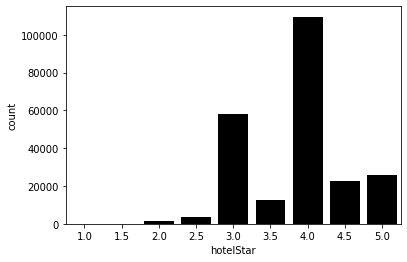

In [16]:
sns.countplot(data_notnull['hotelStar'], color='black')

In [17]:
len(data_notnull.hotel_id.unique())

177

In [18]:
data_notnull.select_dtypes(['int64'])

,hotel_id,bathtub grab bars in some rooms,room service,estonian,check-in/out [express],tennis court,roll-in shower in some rooms,currency exchange,view ports in all guest room and suites doors,facilities for disabled guests,...,self-operating lift to some hotel swimming pools,additional toilet,in-room safe box,mosquito net,interconnecting room(s) available,kitchenette,lithuanian,snorkeling,breakfast [free],access all room by interior corridor
0,968066,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,968066,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,968066,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,968066,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,968066,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136997,1158168,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
136998,1158168,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
136999,1158168,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
137000,1158168,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
table = data_notnull.groupby(['country'])[['rating','hotelStar']+list(data_notnull.select_dtypes(['int64']).iloc[:,1:].columns.values)].mean()

In [20]:
# use apply function to see if theres any all 0 in any column
table.style.applymap(lambda x: 'background-color : red' if x == 0 else 'color: black')

In [21]:
# define column names that all hotels contain that feature
all_1_col = ['wi-fi in public areas', 'thai']

In [22]:
# define column names that all hotels do not contain that feature
dele_col = ['bathtub grab bars in some rooms', 
            'chapel','dryer',
            'transfer showers in some guest rooms',
            'washer','tamil', 
            'adjustable height hand-held shower wand some rooms',
           'non-slip grab bars in some bathrooms',
           'bathtub grab bar','secondary locks on all room windows',
           'accessible concierge desk',
           'assistive listening devices provided for meetings',
           'boating', 'accessible public restrooms',
           'cable channels', 'private entrance', 'restaurant [kosher]',
           'humidifier', 'greek', 'accessibility for some meeting spaces' , 
            'room windows that open', 'gym',
           'lowered night guards on all guest room doors', 'hot spring bath',
           'visual alarms in some guest rooms and suites',
           'lever handles on some guest room doors','mobility accessibility in some rooms',
           'high chair','water sports (non-motorized)','desk/workspace',
           'alarm clock telephone ringers in some rooms','close-caption tv',
           'carbon monoxide detector', 'access some room by interior corridor',
           'free parking','heating','casino','view ports in some guest room and suites doors',
           'khmer', 'water sports (motorized)',
           'first aid kit','hiking','indoor fireplace', 'bowling alley',
           'pets allowed in room','iron', 'accessible entrance to some on-site swimming pool',
           'open air bath privileges','watersport equipment rentals','lowered electrical outlets in all rooms',
           'visual alarm', 'hearing accessible rooms some rooms', 'surfing lessons',
           'self-closing doors on some guest rooms and suites', 'croatian', 'braille and tactile signage',
           'coffee or tea', 'valet parking outfitted for wheelchair', 'accessible vanities in some rooms',
           'parking spaces for cars self-parking facility', 'private pool', 'lowered deadbolts on all guest room doors',
           'secondary locks on some room windows', 'hebrew','electric blanket',
           'room and suites access through exterior corridor', 'private beach','diving',
           'water park','tty/ttd compatibilty in some rooms', 'lowered view ports in some guest room doors',
           'toilet seat at wheelchair height -- all rooms', 'safety chains or latches on some guest room doors',
           'pool', 'lowered night guards on some guest room doors', 'heater',
           'van parking self-parking facility', 'theme park', 'self-operating lift to some hotel swimming pools',
           'snorkeling']

In [23]:
data_notnull.drop(columns=dele_col,inplace=True)
data_notnull.drop(columns=all_1_col,inplace=True)
data_notnull.reset_index(drop=True,inplace=True)

C:\Users\jayjayy\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [24]:
data_notnull

,rating,country,group0,hotel_id,Asiatique - The Riverfront,Central World,Fantasia Lagoon Water Park,Grand Palace,Jim Thompson,Khao San Road,...,cash withdrawal_y,convenience store_y,metro,shoping center,cleanliness,facilities,location,room comfort and quality,service,value for money
0,7.6,others,Business traveler,968066,13.89,9.07,15.61,14.22,10.25,13.58,...,0.21,1.70,2.60,9.1,8.6,7.8,8.4,6.0,8.2,8.5
1,8.0,germany,Solo traveler,968066,13.89,9.07,15.61,14.22,10.25,13.58,...,0.21,1.70,2.60,9.1,8.6,7.8,8.4,6.0,8.2,8.5
2,8.0,thailand,Group,968066,13.89,9.07,15.61,14.22,10.25,13.58,...,0.21,1.70,2.60,9.1,8.6,7.8,8.4,6.0,8.2,8.5
3,6.0,malaysia,Group,968066,13.89,9.07,15.61,14.22,10.25,13.58,...,0.21,1.70,2.60,9.1,8.6,7.8,8.4,6.0,8.2,8.5
4,6.0,malaysia,Group,968066,13.89,9.07,15.61,14.22,10.25,13.58,...,0.21,1.70,2.60,9.1,8.6,7.8,8.4,6.0,8.2,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233537,8.8,taiwan,Group,1158168,11.14,5.42,7.40,7.87,5.43,6.79,...,0.13,0.17,0.04,5.4,8.5,8.5,9.2,9.8,9.2,9.0
233538,8.8,taiwan,Solo traveler,1158168,11.14,5.42,7.40,7.87,5.43,6.79,...,0.13,0.17,0.04,5.4,8.5,8.5,9.2,9.8,9.2,9.0
233539,8.8,taiwan,Solo traveler,1158168,11.14,5.42,7.40,7.87,5.43,6.79,...,0.13,0.17,0.04,5.4,8.5,8.5,9.2,9.8,9.2,9.0
233540,7.2,others,Solo traveler,1158168,11.14,5.42,7.40,7.87,5.43,6.79,...,0.13,0.17,0.04,5.4,8.5,8.5,9.2,9.8,9.2,9.0


In [25]:
data_notnull.columns[4:14].values

array(['Asiatique - The Riverfront', 'Central World',
       'Fantasia Lagoon Water Park', 'Grand Palace', 'Jim Thompson',
       'Khao San Road', 'Wat Bua Khwan', 'Wat Pho Temple',
       'Wat Phra Kaew', 'Wat Saket'], dtype=object)

In [26]:
location=list(data_notnull.columns[-12:-6].values)+list(data_notnull.columns[4:14].values)
location

['Don Mueang International Airport (DMK)',
 'Suvarnabhumi Airport (BKK)',
 'cash withdrawal_y',
 'convenience store_y',
 'metro',
 'shoping center',
 'Asiatique - The Riverfront',
 'Central World',
 'Fantasia Lagoon Water Park',
 'Grand Palace',
 'Jim Thompson',
 'Khao San Road',
 'Wat Bua Khwan',
 'Wat Pho Temple',
 'Wat Phra Kaew',
 'Wat Saket']

In [ ]:
#PCA

In [ ]:
# n_components use to define how much components you want it as ouput
pca=PCA(n_components=5) 
pca.fit(dummy_X[numeric_variables].drop(columns='hotelStar')) 
X_pca=pca.transform(dummy_X[numeric_variables].drop(columns='hotelStar')) 
#let's check the shape of X_pca array
print("shape of X_pca", X_pca.shape)




In [ ]:
# This code use to see how much component is enough
ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)


In [ ]:
# and only 3 is enough
# 3 components can explan 94% of the total variance
component = pd.DataFrame(data=X_pca[:,:3], index=range(len(X_pca[:,:3])),columns=['comp_1','comp_2','comp_3'])

X_ready = pd.concat([onlycrosses_dummy_X[clean], component],axis=1)

In [28]:
#Using randomforest to drop some unnecessary location.(label=location)
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score

In [29]:
X_train,X_test,y_train,y_test=train_test_split(data_notnull[location],data_notnull['location'],test_size=0.3,random_state=42)

In [30]:
param={'n_estimators':[100,300,500],'max_depth':[3,5,7],'min_samples_leaf':[0.1,0.05,0.01]}

In [33]:
grid=GridSearchCV(estimator=RandomForestRegressor(random_state=42),param_grid=param,scoring='neg_mean_squared_error',cv=3,n_jobs=-1,verbose=1)

In [34]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


KeyboardInterrupt: 

In [27]:
grid.best_params_
grid.best_score_

-0.05929957751660204

In [28]:
rf=RandomForestRegressor(n_estimators=100,max_depth=7,min_samples_leaf=0.01,random_state=42)

In [29]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=0.01, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [30]:
y_pred=rf.predict(X_train)


In [31]:
important_feat=pd.Series(rf.feature_importances_,index=location)

In [58]:
sort_important_feat=important_feat.sort_values()
sort_important_feat

access all room by interior corridor                 0.000000e+00
table tennis                                         0.000000e+00
vietnamese                                           0.000000e+00
hindi                                                0.000000e+00
clothes rack                                         0.000000e+00
visual alarms in all guest rooms and suites          0.000000e+00
main entrance                                        0.000000e+00
elevator                                             0.000000e+00
shuttle service                                      0.000000e+00
norwegian                                            0.000000e+00
czech                                                0.000000e+00
hungarian                                            0.000000e+00
mobility accessbility in all rooms                   0.000000e+00
cleaning products                                    0.000000e+00
catalan                                              0.000000e+00
clothes dr

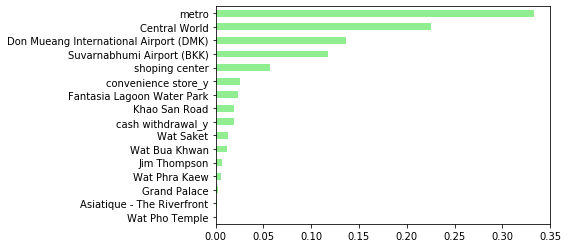

In [33]:
sort_important_feat.plot(kind='barh',color='lightgreen');plt.show()

In [34]:
rmse=MSE(y_train,y_pred)**(1/2)
rmse

0.24465015498528056

In [27]:
#get dummies
data_dummy=pd.get_dummies(data_notnull)
data_dummy.columns[-30:]

Index(['convenience store_y', 'metro', 'shoping center', 'cleanliness',
       'facilities', 'location', 'room comfort and quality', 'service',
       'value for money', 'country_australia', 'country_china',
       'country_france', 'country_germany', 'country_hong kong',
       'country_indonesia', 'country_japan', 'country_malaysia',
       'country_others', 'country_singapore', 'country_south korea',
       'country_taiwan', 'country_thailand', 'country_united kingdom',
       'country_united states', 'group0_Business traveler', 'group0_Couple',
       'group0_Family with teens', 'group0_Family with young children',
       'group0_Group', 'group0_Solo traveler'],
      dtype='object')

In [28]:
#data_dummy.drop(columns=['service','room comfort and quality','value for money'],inplace=True)
data_dummy.columns[13:].values

array(['room service', 'estonian', 'check-in/out [express]',
       'tennis court', 'roll-in shower in some rooms',
       'currency exchange',
       'view ports in all guest room and suites doors',
       'facilities for disabled guests', 'ukrainian', 'non-smoking',
       'turkish', 'free bottled water', 'chinese [cantonese]', 'desk',
       'locker', 'babysitting service', 'wi-fi [free]', 'balcony/terrace',
       'microwave', 'smoking allowed', 'daily newspaper',
       'car power charging station', 'car park [on-site]',
       'fire extinguisher', 'car park [charges apply]',
       'free welcome drink', 'bathtub seat in some rooms',
       'lan internet in room [free]',
       'accessible route to the registration desk',
       'check-in/out [private]', 'fan', 'english', 'scale',
       'deadbolts on all guest room and suites doors', 'latvian',
       'japanese', 'steamroom', 'carpeting',
       'accessible entrance to all on-site swimming pool', 'bathtub',
       'full kitchen',

In [29]:
data_dummy.head()

,rating,hotel_id,Asiatique - The Riverfront,Central World,Fantasia Lagoon Water Park,Grand Palace,Jim Thompson,Khao San Road,Wat Bua Khwan,Wat Pho Temple,...,country_taiwan,country_thailand,country_united kingdom,country_united states,group0_Business traveler,group0_Couple,group0_Family with teens,group0_Family with young children,group0_Group,group0_Solo traveler
0,7.6,968066,13.89,9.07,15.61,14.22,10.25,13.58,16.37,14.09,...,0,0,0,0,1,0,0,0,0,0
1,8.0,968066,13.89,9.07,15.61,14.22,10.25,13.58,16.37,14.09,...,0,0,0,0,0,0,0,0,0,1
2,8.0,968066,13.89,9.07,15.61,14.22,10.25,13.58,16.37,14.09,...,0,1,0,0,0,0,0,0,1,0
3,6.0,968066,13.89,9.07,15.61,14.22,10.25,13.58,16.37,14.09,...,0,0,0,0,0,0,0,0,1,0
4,6.0,968066,13.89,9.07,15.61,14.22,10.25,13.58,16.37,14.09,...,0,0,0,0,0,0,0,0,1,0


In [30]:
country=[i for i in data_dummy.columns.values if 'country' in i]
group=[ j for j in data_dummy.columns.values if 'group0' in j]
print(group)
print(country)
print(data_dummy.columns[260:266].values)


['group0_Business traveler', 'group0_Couple', 'group0_Family with teens', 'group0_Family with young children', 'group0_Group', 'group0_Solo traveler']
['country_australia', 'country_china', 'country_france', 'country_germany', 'country_hong kong', 'country_indonesia', 'country_japan', 'country_malaysia', 'country_others', 'country_singapore', 'country_south korea', 'country_taiwan', 'country_thailand', 'country_united kingdom', 'country_united states']
['Don Mueang International Airport (DMK)' 'Suvarnabhumi Airport (BKK)'
 'cash withdrawal_y' 'convenience store_y' 'metro' 'shoping center']


In [31]:
location=list(data_dummy.columns[260:266].values)+list(data_dummy.columns[2:12].values)
location

['Don Mueang International Airport (DMK)',
 'Suvarnabhumi Airport (BKK)',
 'cash withdrawal_y',
 'convenience store_y',
 'metro',
 'shoping center',
 'Asiatique - The Riverfront',
 'Central World',
 'Fantasia Lagoon Water Park',
 'Grand Palace',
 'Jim Thompson',
 'Khao San Road',
 'Wat Bua Khwan',
 'Wat Pho Temple',
 'Wat Phra Kaew',
 'Wat Saket']

In [34]:
plt.figure(figsize=(10,10))
data_dummy.corr().iloc[:,-30:]

,convenience store_y,metro,shoping center,cleanliness,facilities,location,room comfort and quality,service,value for money,country_australia,...,country_taiwan,country_thailand,country_united kingdom,country_united states,group0_Business traveler,group0_Couple,group0_Family with teens,group0_Family with young children,group0_Group,group0_Solo traveler
rating,0.024746,0.003810,0.049053,0.348738,0.334325,0.201296,0.335012,0.352013,0.329363,0.032668,...,0.012088,-0.020237,0.037836,0.057177,-0.032437,0.039546,0.002524,0.002752,-0.023978,-0.005102
hotel_id,0.291597,0.136570,0.305787,0.206133,0.061980,-0.255065,0.181512,0.165289,0.258471,-0.042876,...,0.037457,0.140209,-0.035335,-0.027646,-0.008206,0.005387,-0.037900,-0.047712,-0.021969,0.068837
Asiatique - The Riverfront,0.322316,0.642835,0.435809,-0.163329,-0.169578,-0.325793,-0.219043,-0.231236,-0.217769,0.016443,...,-0.034376,0.210176,0.011700,0.017053,0.052649,-0.027293,-0.032272,-0.006558,-0.021865,0.027940
Central World,0.350371,0.680944,0.633906,0.078876,0.047981,-0.231626,-0.000481,0.022492,0.039193,0.014264,...,-0.030648,0.255428,0.026211,0.041273,0.042591,0.013160,-0.026957,-0.006769,-0.058645,0.013905
Fantasia Lagoon Water Park,-0.035361,-0.154094,0.043580,0.158903,0.056830,-0.055215,0.140323,0.179821,0.176587,0.007826,...,-0.003775,0.016890,0.029472,0.037301,0.012172,0.013402,-0.020148,-0.010019,-0.055393,0.032965
Grand Palace,0.279398,0.564046,0.431654,-0.036755,-0.077504,-0.328336,-0.073517,-0.075699,-0.084926,0.026874,...,-0.029020,0.207177,0.028707,0.039396,0.072329,-0.030975,-0.042381,-0.007067,-0.052969,0.044911
Jim Thompson,0.340156,0.652659,0.568100,0.071766,0.027330,-0.264005,0.012260,0.027078,0.016868,0.022769,...,-0.031054,0.247150,0.033427,0.047865,0.058829,-0.001312,-0.037232,-0.008266,-0.065987,0.029479
Khao San Road,0.270863,0.548228,0.437899,-0.001245,-0.047930,-0.312044,-0.037649,-0.033923,-0.047678,0.027856,...,-0.028083,0.209079,0.032081,0.044614,0.073109,-0.027304,-0.042467,-0.006986,-0.059483,0.044830
Wat Bua Khwan,-0.075771,-0.252460,-0.019063,0.156846,0.056481,-0.032522,0.145472,0.180516,0.183609,0.004040,...,0.000756,-0.007878,0.024643,0.030758,0.005365,0.014690,-0.016439,-0.009895,-0.048931,0.030013
Wat Pho Temple,0.288368,0.578006,0.437475,-0.047479,-0.085572,-0.332399,-0.086203,-0.089522,-0.097384,0.026193,...,-0.029924,0.210243,0.027426,0.037520,0.071288,-0.030807,-0.042073,-0.007147,-0.050755,0.043844


<Figure size 720x720 with 0 Axes>

In [41]:
# n_components use to define how much components you want it as ouput
from sklearn.decomposition import PCA
pca=PCA(n_components=5) 
pca.fit(data_dummy[location]) 
X_pca=pca.transform(data_dummy[location]) 
#let's check the shape of X_pca array
print("shape of X_pca", X_pca.shape)


shape of X_pca (233542, 5)


In [42]:
# This code use to see how much component is enough
ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio)

[0.66071617 0.1515349  0.1306069  0.0387312  0.01841082]


In [46]:
# and only 3 is enough
# 3 components can explan 94% of the total variance
component = pd.DataFrame(data=X_pca[:,:3], index=range(len(X_pca[:,:3])),columns=['comp_1','comp_2','comp_3'])

component.to_excel('meli_xlsx')

ValueError: No engine for filetype: ''

In [38]:
#choose feature from randomforest regressor('facilities')
best_param_country={}
best_score={}
sort_important_feat={}
rmse={}
for i in country:
        variety_feat=data_dummy[data_dummy[i]==1][data_dummy.columns[13:260].values]
        X_train,X_test,y_train,y_test=train_test_split(variety_feat,data_dummy[data_dummy[i]==1]['facilities'],random_state=42,test_size=0.3)
        grid=GridSearchCV(estimator=RandomForestRegressor(random_state=42),param_grid=param,scoring='neg_mean_squared_error',cv=3,n_jobs=-1,verbose=1)
        grid.fit(X_train,y_train)
        rf=RandomForestRegressor(n_estimators=grid.best_params_['n_estimators'],max_depth=grid.best_params_['max_depth'],min_samples_leaf=grid.best_params_['min_samples_leaf'],random_state=42)
        rf.fit(X_train,y_train)
        y_pred=rf.predict(X_train)
        important_feat=pd.Series(rf.feature_importances_,index=data_dummy.columns[13:260].values)
        sort_important_feat[i]=important_feat.sort_values()
        best_param_country[i]=grid.best_params_
        best_score[i]=grid.best_score_
        rmse[i]=MSE(y_train,y_pred)**1/2


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


KeyboardInterrupt: 

In [ ]:
print(sort_important_feat)
print(best_param_country)
print(rmse)

In [ ]:
country_name=list(sort_important_feat.keys())
features_country_facility={}
for i in country_name:
    a=sort_important_feat[i]
    features_country_facility[i]=[ k for k in a[a>0.15].index.values]#threshold=0.15
features_country_facility


In [93]:
all_feat_faci=[]
for i in features_country_facility.keys():
    all_feat_faci+=features_country_facility[i]
print(all_feat_faci)

['hotelStar', 'sofa', 'hotelStar', 'hotelStar', 'hotelStar', 'fitness center', 'hotelStar', 'chinese [mandarin]', 'hotelStar', 'wake-up service', 'hotelStar', 'chinese [mandarin]', 'hotelStar', 'hotelStar', 'hotelStar', 'hotelStar', 'sofa', 'hotelStar', 'hotelStar', 'non-smoking', 'hotelStar', 'hotelStar']


In [ ]:
#choose feature from randomforest regressor('room comfort and quality service ')
best_param_country_1={}
best_score_1={}
sort_important_feat_1={}
rmse_1={}
for i in country:
        variety_feat=data_dummy[data_dummy[i]==1][data_dummy.columns[13:260].values]
        X_train,X_test,y_train,y_test=train_test_split(variety_feat,data_dummy[data_dummy[i]==1]['room comfort and quality'],random_state=42,test_size=0.3)
        grid=GridSearchCV(estimator=RandomForestRegressor(random_state=42),param_grid=param,scoring='neg_mean_squared_error',cv=3,n_jobs=-1,verbose=1)
        grid.fit(X_train,y_train)
        rf=RandomForestRegressor(n_estimators=grid.best_params_['n_estimators'],max_depth=grid.best_params_['max_depth'],min_samples_leaf=grid.best_params_['min_samples_leaf'],random_state=42)
        rf.fit(X_train,y_train)
        y_pred=rf.predict(X_train)
        important_feat=pd.Series(rf.feature_importances_,index=data_dummy.columns[13:260].values)
        sort_important_feat_1[i]=important_feat.sort_values()
        best_param_country_1[i]=grid.best_params_
        best_score_1[i]=grid.best_score_
        rmse_1[i]=MSE(y_train,y_pred)**1/2

In [ ]:
country_name=list(sort_important_feat_1.keys())
features_country_room={}
for i in country_name:
    a=sort_important_feat_1[i]
    features_country_room[i]=[ k for k in a[a>0.15].index.values]#threshold=0.15
features_country_room

In [96]:
all_feat_room=[]
for i in features_country_room.keys():
    all_feat_room+=features_country_room[i]
print(all_feat_room)


['rental car ', 'hotelStar', 'hotelStar', 'rental car ', 'hotelStar', 'hotelStar', 'hotelStar', 'rental car ', 'hotelStar', 'hotelStar', 'rental car ', 'hotelStar', 'rental car ', 'hotelStar', 'russian', 'hotelStar', 'hotelStar', 'hotelStar', 'hotelStar', 'rental car ', 'hotelStar', 'hotelStar']


In [ ]:
#choose feature from randomforest regressor('service')
best_param_country_2={}
best_score_2={}
sort_important_feat_2={}
rmse_2={}
for i in country:
        variety_feat=data_dummy[data_dummy[i]==1][data_dummy.columns[13:260].values]
        X_train,X_test,y_train,y_test=train_test_split(variety_feat,data_dummy[data_dummy[i]==1]['service'],random_state=42,test_size=0.3)
        grid=GridSearchCV(estimator=RandomForestRegressor(random_state=42),param_grid=param,scoring='neg_mean_squared_error',cv=3,n_jobs=-1,verbose=1)
        grid.fit(X_train,y_train)
        rf=RandomForestRegressor(n_estimators=grid.best_params_['n_estimators'],max_depth=grid.best_params_['max_depth'],min_samples_leaf=grid.best_params_['min_samples_leaf'],random_state=42)
        rf.fit(X_train,y_train)
        y_pred=rf.predict(X_train)
        important_feat=pd.Series(rf.feature_importances_,index=data_dummy.columns[13:260].values)
        sort_important_feat_2[i]=important_feat.sort_values()
        best_param_country_2[i]=grid.best_params_
        best_score_2[i]=grid.best_score_
        rmse_2[i]=MSE(y_train,y_pred)**1/2

In [ ]:
country_name=list(sort_important_feat_2.keys())
features_country_service={}
for i in country_name:
    a=sort_important_feat_2[i]
    features_country_service[i]=[ k for k in a[a>0.15].index.values]#threshold=0.15
features_country_service

In [99]:
all_feat_service=[]
for i in features_country_service.keys():
    all_feat_service+=features_country_service[i]
print(all_feat_service)

['russian', 'hotelStar', 'hotelStar', 'hotelStar', 'hotelStar', 'hotelStar', 'wheelchair accessible', 'rental car ', 'hotelStar', 'hotelStar', 'hotelStar', 'rental car ', 'hotelStar', 'russian', 'hotelStar', 'valet parking', 'hotelStar', 'hotelStar', 'hotelStar', 'russian', 'hotelStar', 'russian', 'hotelStar']


In [ ]:
#choose feature from randomforest regressor('cleanliness')
best_param_country_3={}
best_score_3={}
sort_important_feat_3={}
rmse_3={}
for i in country:
        variety_feat=data_dummy[data_dummy[i]==1][data_dummy.columns[13:260].values]
        X_train,X_test,y_train,y_test=train_test_split(variety_feat,data_dummy[data_dummy[i]==1]['cleanliness'],random_state=42,test_size=0.3)
        grid=GridSearchCV(estimator=RandomForestRegressor(random_state=42),param_grid=param,scoring='neg_mean_squared_error',cv=3,n_jobs=-1,verbose=1)
        grid.fit(X_train,y_train)
        rf=RandomForestRegressor(n_estimators=grid.best_params_['n_estimators'],max_depth=grid.best_params_['max_depth'],min_samples_leaf=grid.best_params_['min_samples_leaf'],random_state=42)
        rf.fit(X_train,y_train)
        y_pred=rf.predict(X_train)
        important_feat=pd.Series(rf.feature_importances_,index=data_dummy.columns[13:260].values)
        sort_important_feat_3[i]=important_feat.sort_values()
        best_param_country_3[i]=grid.best_params_
        best_score_3[i]=grid.best_score_
        rmse_3[i]=MSE(y_train,y_pred)**1/2

In [54]:
country_name=list(sort_important_feat_3.keys())
features_country_cleanliness={}
for i in country_name:
    a=sort_important_feat_3[i]
    features_country_cleanliness[i]=[ k for k in a[a>0.1].index.values]#threshold=0.15
features_country_cleanliness

{'country_australia': ['russian', 'wi-fi [charges apply]'],
 'country_china': ['valet parking', 'free wi-fi in all rooms!'],
 'country_france': ['fireplace',
  'airport transfer',
  'free wi-fi in all rooms!'],
 'country_germany': ['fireplace', 'hindi'],
 'country_hong kong': ['fitness center', 'free wi-fi in all rooms!'],
 'country_indonesia': ['garden',
  'free wi-fi in all rooms!',
  'luggage storage',
  'wi-fi [charges apply]'],
 'country_japan': ['fitness center', 'free wi-fi in all rooms!'],
 'country_malaysia': ['free wi-fi in all rooms!',
  'luggage storage',
  'wi-fi [charges apply]'],
 'country_others': ['rental car ', 'wi-fi [charges apply]'],
 'country_singapore': ['gift/souvenir shop',
  'game room',
  'separate shower/bathtub',
  'garden'],
 'country_south korea': ['free wi-fi in all rooms!', 'airport transfer'],
 'country_taiwan': ['fitness center', 'free wi-fi in all rooms!'],
 'country_thailand': ['fitness center', 'smoking allowed'],
 'country_united kingdom': ['nepal

In [42]:
all_feat_cleanliness=[]
for i in features_country_cleanliness.keys():
    all_feat_cleanliness+=features_country_cleanliness[i]
print(all_feat_cleanliness)

['wi-fi [charges apply]', 'valet parking', 'free wi-fi in all rooms!', 'fireplace', 'airport transfer', 'free wi-fi in all rooms!', 'fitness center', 'free wi-fi in all rooms!', 'luggage storage', 'wi-fi [charges apply]', 'fitness center', 'free wi-fi in all rooms!', 'free wi-fi in all rooms!', 'luggage storage', 'wi-fi [charges apply]', 'wi-fi [charges apply]', 'game room', 'separate shower/bathtub', 'garden', 'free wi-fi in all rooms!', 'airport transfer', 'fitness center', 'free wi-fi in all rooms!', 'smoking allowed', 'russian', 'wi-fi [charges apply]', 'wi-fi [charges apply]']


In [35]:
#choose feature from randomforest regressor('rating')
best_param_country_4={}
best_score_4={}
sort_important_feat_4={}
rmse_4={}
for i in country:
        variety_feat=data_dummy[data_dummy[i]==1][data_dummy.columns[13:260].values]
        X_train,X_test,y_train,y_test=train_test_split(variety_feat,data_dummy[data_dummy[i]==1]['rating'],random_state=42,test_size=0.3)
        grid=GridSearchCV(estimator=RandomForestRegressor(random_state=42),param_grid=param,scoring='neg_mean_squared_error',cv=3,n_jobs=-1,verbose=1)
        grid.fit(X_train,y_train)
        rf=RandomForestRegressor(n_estimators=grid.best_params_['n_estimators'],max_depth=grid.best_params_['max_depth'],min_samples_leaf=grid.best_params_['min_samples_leaf'],random_state=42)
        rf.fit(X_train,y_train)
        y_pred=rf.predict(X_train)
        important_feat=pd.Series(rf.feature_importances_,index=data_dummy.columns[13:260].values)
        sort_important_feat_4[i]=important_feat.sort_values()
        best_param_country_4[i]=grid.best_params_
        best_score_4[i]=grid.best_score_
        rmse_4[i]=MSE(y_train,y_pred)**1/2

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  3.3min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  4.8min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  1.5min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  1.8min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  2.2min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  1.8min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  8.3min finished
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  5.5min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed: 16.4min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  4.6min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   51.5s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  2.8min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  1.9min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  7.1min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   56.5s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  2.7min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   58.7s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  3.2min finished


In [37]:
country_name=list(sort_important_feat_4.keys())
features_country_rating={}
for i in country_name:
    a=sort_important_feat_4[i]
    features_country_rating[i]=[ k for k in a[a>0.05].index.values]#threshold=0.15
features_country_rating

{'country_australia': ['massage', 'wheelchair accessible'],
 'country_china': ['wheelchair accessible',
  'smoking allowed',
  'massage',
  'free wi-fi in all rooms!',
  'valet parking'],
 'country_france': ['air conditioning', 'arabic', 'airport transfer'],
 'country_germany': ['arabic',
  'smoking allowed',
  'massage',
  'wheelchair accessible'],
 'country_hong kong': ['massage', 'wheelchair accessible'],
 'country_indonesia': ['garden',
  'blackout curtains',
  'car park [nearby]',
  'luggage storage',
  'swimming pool [kids]'],
 'country_japan': ['salon',
  'fitness center',
  'free wi-fi in all rooms!',
  'wheelchair accessible'],
 'country_malaysia': ['currency exchange',
  'smoking allowed',
  'blackout curtains',
  'garden',
  'kitchenette'],
 'country_others': ['playground',
  'wi-fi [charges apply]',
  'dry cleaning',
  'convenience store_x',
  'kitchenette'],
 'country_singapore': ['wi-fi [charges apply]',
  'rental car ',
  'garden',
  'security [24-hour]',
  'fitness cent

In [38]:
#choose feature from randomforest regressor('rating')
best_param_country_7={}
best_score_7={}
sort_important_feat_7={}
rmse_7={}
for i in country:
        variety_feat=data_dummy[data_dummy[i]==1][data_dummy.columns[2:13].values]
        X_train,X_test,y_train,y_test=train_test_split(variety_feat,data_dummy[data_dummy[i]==1]['rating'],random_state=42,test_size=0.3)
        grid=GridSearchCV(estimator=RandomForestRegressor(random_state=42),param_grid=param,scoring='neg_mean_squared_error',cv=3,n_jobs=-1,verbose=1)
        grid.fit(X_train,y_train)
        rf=RandomForestRegressor(n_estimators=grid.best_params_['n_estimators'],max_depth=grid.best_params_['max_depth'],min_samples_leaf=grid.best_params_['min_samples_leaf'],random_state=42)
        rf.fit(X_train,y_train)
        y_pred=rf.predict(X_train)
        important_feat=pd.Series(rf.feature_importances_,index=data_dummy.columns[2:13].values)
        sort_important_feat_7[i]=important_feat.sort_values()
        best_param_country_7[i]=grid.best_params_
        best_score_7[i]=grid.best_score_
        rmse_7[i]=MSE(y_train,y_pred)**1/2

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   29.9s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   38.0s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   14.8s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   19.7s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   23.3s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   15.0s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   46.2s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   33.3s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  1.7min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   40.7s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   27.8s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   21.4s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  1.1min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   28.9s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   34.0s finished


In [39]:
country_name=list(sort_important_feat_7.keys())
location_country_rating={}
for i in country_name:
    a=sort_important_feat_7[i]
    location_country_rating[i]=[ k for k in a[a>0.05].index.values]#threshold=0.15
location_country_rating

{'country_australia': ['Wat Pho Temple',
  'Khao San Road',
  'Jim Thompson',
  'Central World',
  'Asiatique - The Riverfront',
  'hotelStar'],
 'country_china': ['Wat Pho Temple',
  'Fantasia Lagoon Water Park',
  'Jim Thompson',
  'Wat Bua Khwan',
  'Wat Saket',
  'Asiatique - The Riverfront',
  'hotelStar',
  'Central World'],
 'country_france': ['Asiatique - The Riverfront',
  'Wat Bua Khwan',
  'Jim Thompson',
  'Central World',
  'hotelStar'],
 'country_germany': ['Jim Thompson',
  'Central World',
  'hotelStar',
  'Asiatique - The Riverfront'],
 'country_hong kong': ['Fantasia Lagoon Water Park',
  'Central World',
  'Wat Bua Khwan',
  'Jim Thompson',
  'hotelStar',
  'Asiatique - The Riverfront'],
 'country_indonesia': ['Asiatique - The Riverfront',
  'Central World',
  'hotelStar'],
 'country_japan': ['Asiatique - The Riverfront',
  'Central World',
  'Wat Bua Khwan',
  'hotelStar'],
 'country_malaysia': ['Jim Thompson',
  'Central World',
  'Asiatique - The Riverfront',
  'h

In [41]:
feat_rating_country={}
for i in country_name:
    feat_rating_country[i]=list(location_country_rating[i])+list(features_country_rating[i])
feat_rating_country

{'country_australia': ['Wat Pho Temple',
  'Khao San Road',
  'Jim Thompson',
  'Central World',
  'Asiatique - The Riverfront',
  'hotelStar',
  'massage',
  'wheelchair accessible'],
 'country_china': ['Wat Pho Temple',
  'Fantasia Lagoon Water Park',
  'Jim Thompson',
  'Wat Bua Khwan',
  'Wat Saket',
  'Asiatique - The Riverfront',
  'hotelStar',
  'Central World',
  'wheelchair accessible',
  'smoking allowed',
  'massage',
  'free wi-fi in all rooms!',
  'valet parking'],
 'country_france': ['Asiatique - The Riverfront',
  'Wat Bua Khwan',
  'Jim Thompson',
  'Central World',
  'hotelStar',
  'air conditioning',
  'arabic',
  'airport transfer'],
 'country_germany': ['Jim Thompson',
  'Central World',
  'hotelStar',
  'Asiatique - The Riverfront',
  'arabic',
  'smoking allowed',
  'massage',
  'wheelchair accessible'],
 'country_hong kong': ['Fantasia Lagoon Water Park',
  'Central World',
  'Wat Bua Khwan',
  'Jim Thompson',
  'hotelStar',
  'Asiatique - The Riverfront',
  'mas

In [42]:
rename_all_feat_each_country={}
for i in feat_rating_country.keys():
    rename_all_feat_each_country[i]={}
    for j in feat_rating_country[i]:
        rename_all_feat_each_country[i][j]= i+j 
rename_all_feat_each_country

{'country_australia': {'Wat Pho Temple': 'country_australiaWat Pho Temple',
  'Khao San Road': 'country_australiaKhao San Road',
  'Jim Thompson': 'country_australiaJim Thompson',
  'Central World': 'country_australiaCentral World',
  'Asiatique - The Riverfront': 'country_australiaAsiatique - The Riverfront',
  'hotelStar': 'country_australiahotelStar',
  'massage': 'country_australiamassage',
  'wheelchair accessible': 'country_australiawheelchair accessible'},
 'country_china': {'Wat Pho Temple': 'country_chinaWat Pho Temple',
  'Fantasia Lagoon Water Park': 'country_chinaFantasia Lagoon Water Park',
  'Jim Thompson': 'country_chinaJim Thompson',
  'Wat Bua Khwan': 'country_chinaWat Bua Khwan',
  'Wat Saket': 'country_chinaWat Saket',
  'Asiatique - The Riverfront': 'country_chinaAsiatique - The Riverfront',
  'hotelStar': 'country_chinahotelStar',
  'Central World': 'country_chinaCentral World',
  'wheelchair accessible': 'country_chinawheelchair accessible',
  'smoking allowed': '

In [43]:
data={}
for i in feat_rating_country.keys():
    each_country=data_dummy.mul(data_dummy[i],axis=0)[feat_rating_country[i]]
    data[i]=each_country.rename(columns=rename_all_feat_each_country[i])

In [44]:
data['country_australia']

,country_australiaWat Pho Temple,country_australiaKhao San Road,country_australiaJim Thompson,country_australiaCentral World,country_australiaAsiatique - The Riverfront,country_australiahotelStar,country_australiamassage,country_australiawheelchair accessible
0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...
233537,0.0,0.0,0.0,0.0,0.0,0.0,0,0
233538,0.0,0.0,0.0,0.0,0.0,0.0,0,0
233539,0.0,0.0,0.0,0.0,0.0,0.0,0,0
233540,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [46]:
dataset=pd.concat([data['country_australia'],data['country_china'],data['country_france'],data['country_germany'],data['country_hong kong'],data['country_indonesia'],data['country_japan'],data['country_malaysia'],data['country_others'],data['country_singapore'],data['country_south korea'],data['country_taiwan'],data['country_thailand'],data['country_united kingdom'],data['country_united states'],data_dummy[['cleanliness', 'facilities', 'location', 'room comfort and quality', 'service','value for money','rating','hotel_id']]],axis=1)
dataset

,country_australiaWat Pho Temple,country_australiaKhao San Road,country_australiaJim Thompson,country_australiaCentral World,country_australiaAsiatique - The Riverfront,country_australiahotelStar,country_australiamassage,country_australiawheelchair accessible,country_chinaWat Pho Temple,country_chinaFantasia Lagoon Water Park,...,country_united statesnepali,country_united statesrussian,cleanliness,facilities,location,room comfort and quality,service,value for money,rating,hotel_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,...,0,0,8.6,7.8,8.4,6.0,8.2,8.5,7.6,968066
1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,...,0,0,8.6,7.8,8.4,6.0,8.2,8.5,8.0,968066
2,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,...,0,0,8.6,7.8,8.4,6.0,8.2,8.5,8.0,968066
3,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,...,0,0,8.6,7.8,8.4,6.0,8.2,8.5,6.0,968066
4,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,...,0,0,8.6,7.8,8.4,6.0,8.2,8.5,6.0,968066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233537,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,...,0,0,8.5,8.5,9.2,9.8,9.2,9.0,8.8,1158168
233538,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,...,0,0,8.5,8.5,9.2,9.8,9.2,9.0,8.8,1158168
233539,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,...,0,0,8.5,8.5,9.2,9.8,9.2,9.0,8.8,1158168
233540,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,...,0,0,8.5,8.5,9.2,9.8,9.2,9.0,7.2,1158168


In [47]:
dataset.to_excel('data_complete_rating.xlsx')

In [40]:
location2=list(data_dummy.columns.values[2:12])+list(data_dummy.columns.values[260:266])

In [46]:
#choose feature from randomforest regressor('location')
best_param_country_5={}
best_score_5={}
sort_important_feat_5={}
rmse_5={}
for i in country:
        variety_feat=data_dummy[data_dummy[i]==1][data_dummy.columns[13:260].values]
        X_train,X_test,y_train,y_test=train_test_split(variety_feat,data_dummy[data_dummy[i]==1]['location'],random_state=42,test_size=0.3)
        grid=GridSearchCV(estimator=RandomForestRegressor(random_state=42),param_grid=param,scoring='neg_mean_squared_error',cv=3,n_jobs=-1,verbose=1)
        grid.fit(X_train,y_train)
        rf=RandomForestRegressor(n_estimators=grid.best_params_['n_estimators'],max_depth=grid.best_params_['max_depth'],min_samples_leaf=grid.best_params_['min_samples_leaf'],random_state=42)
        rf.fit(X_train,y_train)
        y_pred=rf.predict(X_train)
        important_feat=pd.Series(rf.feature_importances_,index=data_dummy.columns[13:260].values)
        sort_important_feat_5[i]=important_feat.sort_values()
        best_param_country_5[i]=grid.best_params_
        best_score_5[i]=grid.best_score_
        rmse_5[i]=MSE(y_train,y_pred)**1/2

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  2.7min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   59.4s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  3.2min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  1.3min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  1.3min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  1.6min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  1.2min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  5.4min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  3.5min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed: 11.1min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  4.6min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   56.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  2.9min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  2.4min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  8.4min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  2.9min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   59.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  3.0min finished


In [52]:
country_name=list(sort_important_feat_5.keys())
features_country_location={}
for i in country_name:
    a=sort_important_feat_5[i]
    features_country_location[i]=[ k for k in a[a>0.10].index.values]#threshold=0.15
features_country_location

{'country_australia': ['desk', 'kitchenette'],
 'country_china': ['bathtub', 'safety deposit boxes'],
 'country_france': ['hot tub', 'lao', 'kitchenette'],
 'country_germany': ['safety deposit boxes', 'kitchenette'],
 'country_hong kong': ['library', 'smoke-free property'],
 'country_indonesia': ['lao'],
 'country_japan': ['separate dining area', 'kitchenette'],
 'country_malaysia': ['kitchenette'],
 'country_others': ['lao', 'kitchenette'],
 'country_singapore': ['check-in/out [express]', 'rental car ', 'kitchenette'],
 'country_south korea': ['smoke-free property', 'poolside bar', 'kitchenette'],
 'country_taiwan': ['microwave'],
 'country_thailand': ['bathtub', 'refrigerator', 'kitchenette'],
 'country_united kingdom': ['cash withdrawal_x', 'kitchenette'],
 'country_united states': ['cash withdrawal_x', 'kitchenette']}

In [49]:
#choose feature from randomforest regressor('value for money')
best_param_country_6={}
best_score_6={}
sort_important_feat_6={}
rmse_6={}
for i in country:
        variety_feat=data_dummy[data_dummy[i]==1][data_dummy.columns[13:260].values]
        X_train,X_test,y_train,y_test=train_test_split(variety_feat,data_dummy[data_dummy[i]==1]['value for money'],random_state=42,test_size=0.3)
        grid=GridSearchCV(estimator=RandomForestRegressor(random_state=42),param_grid=param,scoring='neg_mean_squared_error',cv=3,n_jobs=-1,verbose=1)
        grid.fit(X_train,y_train)
        rf=RandomForestRegressor(n_estimators=grid.best_params_['n_estimators'],max_depth=grid.best_params_['max_depth'],min_samples_leaf=grid.best_params_['min_samples_leaf'],random_state=42)
        rf.fit(X_train,y_train)
        y_pred=rf.predict(X_train)
        important_feat=pd.Series(rf.feature_importances_,index=data_dummy.columns[13:260].values)
        sort_important_feat_6[i]=important_feat.sort_values()
        best_param_country_6[i]=grid.best_params_
        best_score_6[i]=grid.best_score_
        rmse_6[i]=MSE(y_train,y_pred)**1/2

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   58.5s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  2.7min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  3.6min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  1.3min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  1.5min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  1.6min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  1.4min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  6.7min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  4.2min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed: 11.6min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  4.8min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  3.1min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   40.6s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  1.7min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  7.9min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  3.6min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  4.3min finished


In [51]:
country_name=list(sort_important_feat_6.keys())
features_country_money={}
for i in country_name:
    a=sort_important_feat_6[i]
    features_country_money[i]=[ k for k in a[a>0.10].index.values]#threshold=0.15
features_country_money

{'country_australia': ['wi-fi [charges apply]', 'rental car '],
 'country_china': ['free wi-fi in all rooms!',
  'check-in/out [express]',
  'valet parking'],
 'country_france': ['valet parking',
  'blackout curtains',
  'toiletries',
  'fireplace'],
 'country_germany': ['spa', 'fireplace', 'valet parking'],
 'country_hong kong': ['fitness center',
  'convenience store_x',
  'valet parking'],
 'country_indonesia': ['currency exchange', 'kitchen', 'blackout curtains'],
 'country_japan': ['fitness center', 'fireplace'],
 'country_malaysia': ['massage', 'blackout curtains'],
 'country_others': ['valet parking', 'wi-fi [charges apply]', 'rental car '],
 'country_singapore': ['playground',
  'rental car ',
  'blackout curtains',
  'shops'],
 'country_south korea': ['rental car ',
  'valet parking',
  'wheelchair accessible'],
 'country_taiwan': ['valet parking', 'blackout curtains', 'mini bar'],
 'country_thailand': ['rental car '],
 'country_united kingdom': ['nepali', 'fireplace'],
 'coun

In [59]:
features_country_facility={'country_australia': ['fitness center', 'nepali', 'wi-fi [charges apply]'],
 'country_china': ['smoking allowed',
  'free wi-fi in all rooms!',
  'fitness center'],
 'country_france': ['airport transfer'],
 'country_germany': ['kitchenette', 'salon', 'hindi', 'wheelchair accessible'],
 'country_hong kong': ['fitness center'],
 'country_indonesia': ['blackout curtains', 'swimming pool [kids]'],
 'country_japan': ['fitness center', 'free wi-fi in all rooms!'],
 'country_malaysia': ['laundry service',
  'blackout curtains',
  'smoking allowed',
  'fitness center'],
 'country_others': ['nepali',
  'smoking allowed',
  'fitness center',
  'free wi-fi in all rooms!'],
 'country_singapore': ['smoking allowed',
  'blackout curtains',
  'fitness center'],
 'country_south korea': ['valet parking',
  'smoking allowed',
  'swimming pool [outdoor]'],
 'country_taiwan': ['free wi-fi in all rooms!', 'fitness center'],
 'country_thailand': ['free wi-fi in all rooms!', 'non-smoking'],
 'country_united kingdom': ['nepali',
  'playground',
  'fitness center',
  'free wi-fi in all rooms!'],
 'country_united states': ['smoking allowed', 'nepali', 'fitness center']}

In [60]:
features_country_room={'country_australia': ['fitness center', 'wi-fi [charges apply]'],
 'country_china': ['smoking allowed', 'fitness center'],
 'country_france': ['fireplace'],
 'country_germany': ['fireplace', 'wheelchair accessible'],
 'country_hong kong': ['fitness center'],
 'country_indonesia': ['garden'],
 'country_japan': ['fitness center', 'free wi-fi in all rooms!'],
 'country_malaysia': ['blackout curtains', 'kitchenette', 'garden'],
 'country_others': ['playground',
  'convenience store_x',
  'tours',
  'wi-fi [charges apply]',
  'kitchenette'],
 'country_singapore': ['currency exchange', 'garden'],
 'country_south korea': ['wheelchair accessible'],
 'country_taiwan': ['smoking allowed', 'fitness center'],
 'country_thailand': ['complimentary tea', 'kitchenette', 'non-smoking'],
 'country_united kingdom': ['fireplace', 'convenience store_x'],
 'country_united states': ['playground', 'convenience store_x', 'kitchenette']}

In [61]:
features_country_service={'country_australia': ['salon', 'russian', 'wi-fi [charges apply]'],
 'country_china': ['chinese [mandarin]',
  'free wi-fi in all rooms!',
  'wheelchair accessible'],
 'country_france': ['air conditioning', 'fireplace', 'airport transfer'],
 'country_germany': ['tours', 'salon', 'massage', 'wheelchair accessible'],
 'country_hong kong': ['wheelchair accessible'],
 'country_indonesia': ['blackout curtains', 'garden'],
 'country_japan': ['wake-up service',
  'fitness center',
  'free wi-fi in all rooms!'],
 'country_malaysia': ['wi-fi [charges apply]', 'luggage storage'],
 'country_others': ['fitness center', 'rental car ', 'wi-fi [charges apply]'],
 'country_singapore': ['shops', 'security [24-hour]', 'garden'],
 'country_south korea': ['valet parking', 'airport transfer'],
 'country_taiwan': ['wheelchair accessible'],
 'country_thailand': ['safety deposit boxes', 'smoking allowed'],
 'country_united kingdom': ['wi-fi [charges apply]',
  'playground',
  'convenience store_x'],
 'country_united states': ['library']}

In [66]:
#all features
feat_each_country={}
for i in country_name:
    feat_each_country[i]=list(features_country_facility[i])+list(features_country_service[i])+list(features_country_room[i])+list(features_country_location[i])+list(features_country_money[i])+list(features_country_cleanliness[i])
    feat_each_country[i]=np.unique(feat_each_country[i])
feat_each_country

{'country_australia': array(['desk', 'fitness center', 'kitchenette', 'nepali', 'rental car ',
        'russian', 'salon', 'wi-fi [charges apply]'], dtype='<U21'),
 'country_china': array(['bathtub', 'check-in/out [express]', 'chinese [mandarin]',
        'fitness center', 'free wi-fi in all rooms!',
        'safety deposit boxes', 'smoking allowed', 'valet parking',
        'wheelchair accessible'], dtype='<U24'),
 'country_france': array(['air conditioning', 'airport transfer', 'blackout curtains',
        'fireplace', 'free wi-fi in all rooms!', 'hot tub', 'kitchenette',
        'lao', 'toiletries', 'valet parking'], dtype='<U24'),
 'country_germany': array(['fireplace', 'hindi', 'kitchenette', 'massage',
        'safety deposit boxes', 'salon', 'spa', 'tours', 'valet parking',
        'wheelchair accessible'], dtype='<U21'),
 'country_hong kong': array(['convenience store_x', 'fitness center',
        'free wi-fi in all rooms!', 'library', 'smoke-free property',
        'valet park

In [ ]:
#เลือกlocationจากlabelsต่างๆ
#choose location from randomforest regressor('facilities')
best_param_country={}
best_score={}
sort_important_feat={}
rmse={}
for i in country:
        variety_feat=data_dummy[data_dummy[i]==1][data_dummy.columns[2:13].values]
        X_train,X_test,y_train,y_test=train_test_split(variety_feat,data_dummy[data_dummy[i]==1]['facilities'],random_state=42,test_size=0.3)
        grid=GridSearchCV(estimator=RandomForestRegressor(random_state=42),param_grid=param,scoring='neg_mean_squared_error',cv=3,n_jobs=-1,verbose=1)
        grid.fit(X_train,y_train)
        rf=RandomForestRegressor(n_estimators=grid.best_params_['n_estimators'],max_depth=grid.best_params_['max_depth'],min_samples_leaf=grid.best_params_['min_samples_leaf'],random_state=42)
        rf.fit(X_train,y_train)
        y_pred=rf.predict(X_train)
        important_feat=pd.Series(rf.feature_importances_,index=data_dummy.columns[2:13].values)
        sort_important_feat[i]=important_feat.sort_values()
        best_param_country[i]=grid.best_params_
        best_score[i]=grid.best_score_
        rmse[i]=MSE(y_train,y_pred)**1/2


In [ ]:
country_name=list(sort_important_feat.keys())
location_country_facility={}
for i in country_name:
    a=sort_important_feat[i]
    location_country_facility[i]=[ k for k in a[a>0.15].index.values]#threshold=0.15
location_country_facility

In [ ]:
#choose location from randomforest regressor('room comfort and quality service ')
best_param_country_1={}
best_score_1={}
sort_important_feat_1={}
rmse_1={}
for i in country:
        variety_feat=data_dummy[data_dummy[i]==1][data_dummy.columns[2:13].values]
        X_train,X_test,y_train,y_test=train_test_split(variety_feat,data_dummy[data_dummy[i]==1]['room comfort and quality'],random_state=42,test_size=0.3)
        grid=GridSearchCV(estimator=RandomForestRegressor(random_state=42),param_grid=param,scoring='neg_mean_squared_error',cv=3,n_jobs=-1,verbose=1)
        grid.fit(X_train,y_train)
        rf=RandomForestRegressor(n_estimators=grid.best_params_['n_estimators'],max_depth=grid.best_params_['max_depth'],min_samples_leaf=grid.best_params_['min_samples_leaf'],random_state=42)
        rf.fit(X_train,y_train)
        y_pred=rf.predict(X_train)
        important_feat=pd.Series(rf.feature_importances_,index=data_dummy.columns[2:13].values)
        sort_important_feat_1[i]=important_feat.sort_values()
        best_param_country_1[i]=grid.best_params_
        best_score_1[i]=grid.best_score_
        rmse_1[i]=MSE(y_train,y_pred)**1/2

In [ ]:
country_name=list(sort_important_feat_1.keys())
location_country_room={}
for i in country_name:
    a=sort_important_feat_1[i]
    location_country_room[i]=[ k for k in a[a>0.15].index.values]#threshold=0.15
location_country_room

In [ ]:
#choose location from randomforest regressor('service')
best_param_country_2={}
best_score_2={}
sort_important_feat_2={}
rmse_2={}
for i in country:
        variety_feat=data_dummy[data_dummy[i]==1][data_dummy.columns[2:13].values]
        X_train,X_test,y_train,y_test=train_test_split(variety_feat,data_dummy[data_dummy[i]==1]['service'],random_state=42,test_size=0.3)
        grid=GridSearchCV(estimator=RandomForestRegressor(random_state=42),param_grid=param,scoring='neg_mean_squared_error',cv=3,n_jobs=-1,verbose=1)
        grid.fit(X_train,y_train)
        rf=RandomForestRegressor(n_estimators=grid.best_params_['n_estimators'],max_depth=grid.best_params_['max_depth'],min_samples_leaf=grid.best_params_['min_samples_leaf'],random_state=42)
        rf.fit(X_train,y_train)
        y_pred=rf.predict(X_train)
        important_feat=pd.Series(rf.feature_importances_,index=data_dummy.columns[2:13].values)
        sort_important_feat_2[i]=important_feat.sort_values()
        best_param_country_2[i]=grid.best_params_
        best_score_2[i]=grid.best_score_
        rmse_2[i]=MSE(y_train,y_pred)**1/2

In [ ]:
country_name=list(sort_important_feat_2.keys())
location_country_service={}
for i in country_name:
    a=sort_important_feat_2[i]
    location_country_service[i]=[ k for k in a[a>0.15].index.values]#threshold=0.15
location_country_service

In [55]:
#choose location from randomforest regressor('cleanliness')
best_param_country_3={}
best_score_3={}
sort_important_feat_3={}
rmse_3={}
for i in country:
        variety_feat=data_dummy[data_dummy[i]==1][data_dummy.columns[2:13].values]
        X_train,X_test,y_train,y_test=train_test_split(variety_feat,data_dummy[data_dummy[i]==1]['cleanliness'],random_state=42,test_size=0.3)
        grid=GridSearchCV(estimator=RandomForestRegressor(random_state=42),param_grid=param,scoring='neg_mean_squared_error',cv=3,n_jobs=-1,verbose=1)
        grid.fit(X_train,y_train)
        rf=RandomForestRegressor(n_estimators=grid.best_params_['n_estimators'],max_depth=grid.best_params_['max_depth'],min_samples_leaf=grid.best_params_['min_samples_leaf'],random_state=42)
        rf.fit(X_train,y_train)
        y_pred=rf.predict(X_train)
        important_feat=pd.Series(rf.feature_importances_,index=data_dummy.columns[2:13].values)
        sort_important_feat_3[i]=important_feat.sort_values()
        best_param_country_3[i]=grid.best_params_
        best_score_3[i]=grid.best_score_
        rmse_3[i]=MSE(y_train,y_pred)**1/2

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   39.3s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   38.0s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   18.5s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   19.5s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   21.5s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   16.6s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   55.0s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   37.3s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   36.4s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  1.8min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   47.4s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   28.2s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   22.4s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  1.3min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   29.0s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   31.9s finished


In [56]:
country_name=list(sort_important_feat_3.keys())
location_country_cleanliness={}
for i in country_name:
    a=sort_important_feat_3[i]
    location_country_cleanliness[i]=[ k for k in a[a>0.15].index.values]#threshold=0.15
location_country_cleanliness

{'country_australia': ['Central World',
  'Jim Thompson',
  'Asiatique - The Riverfront',
  'hotelStar'],
 'country_china': ['Central World', 'hotelStar'],
 'country_france': ['Asiatique - The Riverfront',
  'Jim Thompson',
  'Central World',
  'hotelStar'],
 'country_germany': ['Asiatique - The Riverfront', 'hotelStar'],
 'country_hong kong': ['hotelStar'],
 'country_indonesia': ['hotelStar', 'Central World'],
 'country_japan': ['Asiatique - The Riverfront', 'Central World', 'hotelStar'],
 'country_malaysia': ['hotelStar', 'Central World'],
 'country_others': ['Jim Thompson', 'Central World', 'hotelStar'],
 'country_singapore': ['Jim Thompson'],
 'country_south korea': ['hotelStar'],
 'country_taiwan': ['hotelStar'],
 'country_thailand': ['Wat Saket', 'Jim Thompson', 'hotelStar'],
 'country_united kingdom': ['Central World', 'Jim Thompson', 'hotelStar'],
 'country_united states': ['Central World',
  'Asiatique - The Riverfront',
  'hotelStar']}

In [57]:
#choose location from randomforest regressor('location')
best_param_country_5={}
best_score_5={}
sort_important_feat_5={}
rmse_5={}
for i in country:
        variety_feat=data_dummy[data_dummy[i]==1][data_dummy.columns[2:13].values]
        X_train,X_test,y_train,y_test=train_test_split(variety_feat,data_dummy[data_dummy[i]==1]['location'],random_state=42,test_size=0.3)
        grid=GridSearchCV(estimator=RandomForestRegressor(random_state=42),param_grid=param,scoring='neg_mean_squared_error',cv=3,n_jobs=-1,verbose=1)
        grid.fit(X_train,y_train)
        rf=RandomForestRegressor(n_estimators=grid.best_params_['n_estimators'],max_depth=grid.best_params_['max_depth'],min_samples_leaf=grid.best_params_['min_samples_leaf'],random_state=42)
        rf.fit(X_train,y_train)
        y_pred=rf.predict(X_train)
        important_feat=pd.Series(rf.feature_importances_,index=data_dummy.columns[2:13].values)
        sort_important_feat_5[i]=important_feat.sort_values()
        best_param_country_5[i]=grid.best_params_
        best_score_5[i]=grid.best_score_
        rmse_5[i]=MSE(y_train,y_pred)**1/2

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   39.3s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   42.5s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   18.6s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   20.5s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   20.4s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   18.4s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   56.8s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   42.1s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  1.9min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   48.3s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   35.0s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   29.3s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  1.6min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   29.5s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   43.2s finished


In [58]:
country_name=list(sort_important_feat_5.keys())
location_country_location={}
for i in country_name:
    a=sort_important_feat_5[i]
    location_country_location[i]=[ k for k in a[a>0.15].index.values]#threshold=0.15
location_country_location

{'country_australia': ['Fantasia Lagoon Water Park',
  'Asiatique - The Riverfront'],
 'country_china': ['Central World', 'Jim Thompson'],
 'country_france': ['Central World', 'Wat Pho Temple'],
 'country_germany': ['Fantasia Lagoon Water Park',
  'Central World',
  'Asiatique - The Riverfront'],
 'country_hong kong': ['Wat Saket'],
 'country_indonesia': ['Fantasia Lagoon Water Park',
  'Central World',
  'Asiatique - The Riverfront'],
 'country_japan': ['Asiatique - The Riverfront', 'Central World'],
 'country_malaysia': ['Fantasia Lagoon Water Park',
  'Asiatique - The Riverfront',
  'Central World'],
 'country_others': ['Asiatique - The Riverfront',
  'Fantasia Lagoon Water Park',
  'Central World'],
 'country_singapore': ['Central World'],
 'country_south korea': ['Wat Pho Temple'],
 'country_taiwan': ['Asiatique - The Riverfront', 'Central World'],
 'country_thailand': ['Central World'],
 'country_united kingdom': ['Fantasia Lagoon Water Park',
  'Asiatique - The Riverfront'],
 'c

In [67]:
#choose feature from randomforest regressor('value for money')
best_param_country_6={}
best_score_6={}
sort_important_feat_6={}
rmse_6={}
for i in country:
        variety_feat=data_dummy[data_dummy[i]==1][data_dummy.columns[2:13].values]
        X_train,X_test,y_train,y_test=train_test_split(variety_feat,data_dummy[data_dummy[i]==1]['value for money'],random_state=42,test_size=0.3)
        grid=GridSearchCV(estimator=RandomForestRegressor(random_state=42),param_grid=param,scoring='neg_mean_squared_error',cv=3,n_jobs=-1,verbose=1)
        grid.fit(X_train,y_train)
        rf=RandomForestRegressor(n_estimators=grid.best_params_['n_estimators'],max_depth=grid.best_params_['max_depth'],min_samples_leaf=grid.best_params_['min_samples_leaf'],random_state=42)
        rf.fit(X_train,y_train)
        y_pred=rf.predict(X_train)
        important_feat=pd.Series(rf.feature_importances_,index=data_dummy.columns[2:13].values)
        sort_important_feat_6[i]=important_feat.sort_values()
        best_param_country_6[i]=grid.best_params_
        best_score_6[i]=grid.best_score_
        rmse_6[i]=MSE(y_train,y_pred)**1/2

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   37.4s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   41.5s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   19.9s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   19.1s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   23.8s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   16.7s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   51.6s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   38.7s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  1.7min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   44.0s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   31.4s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   24.5s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  1.4min finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   29.6s finished


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:   34.3s finished


In [78]:
country_name=list(sort_important_feat_6.keys())
location_country_money={}
for i in country_name:
    a=sort_important_feat_6[i]
    location_country_money[i]=[ k for k in a[a>0.15].index.values]#threshold=0.15
location_country_money

{'country_australia': ['Asiatique - The Riverfront', 'Central World'],
 'country_china': ['Central World', 'Asiatique - The Riverfront'],
 'country_france': ['Jim Thompson', 'Asiatique - The Riverfront'],
 'country_germany': ['Asiatique - The Riverfront'],
 'country_hong kong': ['Fantasia Lagoon Water Park', 'hotelStar'],
 'country_indonesia': ['Fantasia Lagoon Water Park', 'Central World'],
 'country_japan': ['Asiatique - The Riverfront', 'hotelStar', 'Wat Bua Khwan'],
 'country_malaysia': ['Fantasia Lagoon Water Park', 'Central World'],
 'country_others': ['Asiatique - The Riverfront', 'Central World'],
 'country_singapore': ['Asiatique - The Riverfront', 'Jim Thompson'],
 'country_south korea': ['hotelStar', 'Asiatique - The Riverfront'],
 'country_taiwan': ['Wat Bua Khwan', 'hotelStar'],
 'country_thailand': ['Asiatique - The Riverfront', 'Jim Thompson'],
 'country_united kingdom': ['Central World', 'Asiatique - The Riverfront'],
 'country_united states': ['Central World', 'Asiatiq

In [73]:
location_country_facility={'country_australia': ['Asiatique - The Riverfront', 'hotelStar'],
 'country_china': ['Central World', 'hotelStar'],
 'country_france': ['Asiatique - The Riverfront', 'hotelStar'],
 'country_germany': ['Asiatique - The Riverfront', 'hotelStar'],
 'country_hong kong': ['Wat Bua Khwan', 'hotelStar'],
 'country_indonesia': ['Central World', 'hotelStar'],
 'country_japan': ['hotelStar'],
 'country_malaysia': ['Central World', 'hotelStar'],
 'country_others': ['Asiatique - The Riverfront', 'hotelStar'],
 'country_singapore': ['Central World', 'hotelStar'],
 'country_south korea': ['Wat Bua Khwan',
  'Asiatique - The Riverfront',
  'hotelStar'],
 'country_taiwan': ['hotelStar'],
 'country_thailand': ['Central World',
  'Wat Bua Khwan',
  'Fantasia Lagoon Water Park',
  'hotelStar'],
 'country_united kingdom': ['Wat Bua Khwan',
  'Asiatique - The Riverfront',
  'hotelStar'],
 'country_united states': ['Asiatique - The Riverfront', 'hotelStar']}

In [76]:
location_country_room={'country_australia': ['hotelStar',
  'Asiatique - The Riverfront',
  'Jim Thompson'],
 'country_china': ['hotelStar'],
 'country_france': ['Central World', 'Jim Thompson', 'hotelStar'],
 'country_germany': ['Jim Thompson',
  'Asiatique - The Riverfront',
  'hotelStar'],
 'country_hong kong': ['Asiatique - The Riverfront', 'hotelStar'],
 'country_indonesia': ['Jim Thompson'],
 'country_japan': ['Asiatique - The Riverfront', 'hotelStar'],
 'country_malaysia': ['Jim Thompson'],
 'country_others': ['Asiatique - The Riverfront', 'Jim Thompson'],
 'country_singapore': ['Central World', 'Jim Thompson'],
 'country_south korea': ['hotelStar'],
 'country_taiwan': ['Central World', 'hotelStar'],
 'country_thailand': ['Central World', 'Wat Bua Khwan', 'hotelStar'],
 'country_united kingdom': ['hotelStar',
  'Jim Thompson',
  'Asiatique - The Riverfront'],
 'country_united states': ['hotelStar', 'Asiatique - The Riverfront']}

In [75]:
location_country_service={'country_australia': ['Asiatique - The Riverfront',
  'Jim Thompson',
  'hotelStar'],
 'country_china': ['Wat Pho Temple', 'Jim Thompson'],
 'country_france': ['Central World',
  'Jim Thompson',
  'Asiatique - The Riverfront',
  'hotelStar'],
 'country_germany': ['Asiatique - The Riverfront', 'hotelStar'],
 'country_hong kong': ['Wat Bua Khwan', 'hotelStar'],
 'country_indonesia': ['hotelStar', 'Jim Thompson'],
 'country_japan': ['Wat Bua Khwan', 'hotelStar'],
 'country_malaysia': ['hotelStar', 'Jim Thompson'],
 'country_others': ['Asiatique - The Riverfront', 'Jim Thompson'],
 'country_singapore': ['Jim Thompson'],
 'country_south korea': ['Asiatique - The Riverfront',
  'Wat Bua Khwan',
  'hotelStar'],
 'country_taiwan': ['Asiatique - The Riverfront',
  'Wat Bua Khwan',
  'hotelStar'],
 'country_thailand': ['Wat Bua Khwan',
  'hotelStar',
  'Asiatique - The Riverfront'],
 'country_united kingdom': ['Jim Thompson',
  'hotelStar',
  'Asiatique - The Riverfront'],
 'country_united states': ['hotelStar', 'Asiatique - The Riverfront']}

In [79]:
location_each_country={}
for i in country_name:
    location_each_country[i]=list(location_country_facility[i])+list(location_country_service[i])+list(location_country_room[i])+list(location_country_location[i])+list(location_country_money[i])+list(location_country_cleanliness[i])
    location_each_country[i]=np.unique(location_each_country[i])
location_each_country

{'country_australia': array(['Asiatique - The Riverfront', 'Central World',
        'Fantasia Lagoon Water Park', 'Jim Thompson', 'hotelStar'],
       dtype='<U26'),
 'country_china': array(['Asiatique - The Riverfront', 'Central World', 'Jim Thompson',
        'Wat Pho Temple', 'hotelStar'], dtype='<U26'),
 'country_france': array(['Asiatique - The Riverfront', 'Central World', 'Jim Thompson',
        'Wat Pho Temple', 'hotelStar'], dtype='<U26'),
 'country_germany': array(['Asiatique - The Riverfront', 'Central World',
        'Fantasia Lagoon Water Park', 'Jim Thompson', 'hotelStar'],
       dtype='<U26'),
 'country_hong kong': array(['Asiatique - The Riverfront', 'Fantasia Lagoon Water Park',
        'Wat Bua Khwan', 'Wat Saket', 'hotelStar'], dtype='<U26'),
 'country_indonesia': array(['Asiatique - The Riverfront', 'Central World',
        'Fantasia Lagoon Water Park', 'Jim Thompson', 'hotelStar'],
       dtype='<U26'),
 'country_japan': array(['Asiatique - The Riverfront', 'Centr

In [82]:
all_feat_each_country={}
for i in country_name:
    all_feat_each_country[i]=list(location_each_country[i])+list(feat_each_country[i])
    all_feat_each_country[i]=np.unique(all_feat_each_country[i])
all_feat_each_country

{'country_australia': array(['Asiatique - The Riverfront', 'Central World',
        'Fantasia Lagoon Water Park', 'Jim Thompson', 'desk',
        'fitness center', 'hotelStar', 'kitchenette', 'nepali',
        'rental car ', 'russian', 'salon', 'wi-fi [charges apply]'],
       dtype='<U26'),
 'country_china': array(['Asiatique - The Riverfront', 'Central World', 'Jim Thompson',
        'Wat Pho Temple', 'bathtub', 'check-in/out [express]',
        'chinese [mandarin]', 'fitness center', 'free wi-fi in all rooms!',
        'hotelStar', 'safety deposit boxes', 'smoking allowed',
        'valet parking', 'wheelchair accessible'], dtype='<U26'),
 'country_france': array(['Asiatique - The Riverfront', 'Central World', 'Jim Thompson',
        'Wat Pho Temple', 'air conditioning', 'airport transfer',
        'blackout curtains', 'fireplace', 'free wi-fi in all rooms!',
        'hot tub', 'hotelStar', 'kitchenette', 'lao', 'toiletries',
        'valet parking'], dtype='<U26'),
 'country_german

In [ ]:
facility={}
for i in country_name:
    facility[i]=list(location_country_facility[i])+list(features_country_facility[i])
facility

In [ ]:
location={}
for i in country_name:
    location[i]=list(location_country_location[i])+list(features_country_location[i])
location


In [ ]:
service={}
for i in country_name:
    service[i]=list(location_country_service[i])+list(features_country_service[i])
service

In [ ]:
room={}
for i in country_name:
    room[i]=list(location_country_room[i])+list(features_country_room[i])
room

In [ ]:
cleanliness={}
for i in country_name:
    cleanliness[i]=list(location_country_cleanliness[i])+list(features_country_cleanliness[i])
cleanliness

In [ ]:
money={}
for i in country_name:
    money[i]=list(location_country_money[i])+list(features_country_money[i])
money

In [84]:
data_dummy

,rating,hotel_id,Asiatique - The Riverfront,Central World,Fantasia Lagoon Water Park,Grand Palace,Jim Thompson,Khao San Road,Wat Bua Khwan,Wat Pho Temple,...,country_taiwan,country_thailand,country_united kingdom,country_united states,group0_Business traveler,group0_Couple,group0_Family with teens,group0_Family with young children,group0_Group,group0_Solo traveler
0,7.6,968066,13.89,9.07,15.61,14.22,10.25,13.58,16.37,14.09,...,0,0,0,0,1,0,0,0,0,0
1,8.0,968066,13.89,9.07,15.61,14.22,10.25,13.58,16.37,14.09,...,0,0,0,0,0,0,0,0,0,1
2,8.0,968066,13.89,9.07,15.61,14.22,10.25,13.58,16.37,14.09,...,0,1,0,0,0,0,0,0,1,0
3,6.0,968066,13.89,9.07,15.61,14.22,10.25,13.58,16.37,14.09,...,0,0,0,0,0,0,0,0,1,0
4,6.0,968066,13.89,9.07,15.61,14.22,10.25,13.58,16.37,14.09,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233537,8.8,1158168,11.14,5.42,7.40,7.87,5.43,6.79,8.55,8.06,...,1,0,0,0,0,0,0,0,1,0
233538,8.8,1158168,11.14,5.42,7.40,7.87,5.43,6.79,8.55,8.06,...,1,0,0,0,0,0,0,0,0,1
233539,8.8,1158168,11.14,5.42,7.40,7.87,5.43,6.79,8.55,8.06,...,1,0,0,0,0,0,0,0,0,1
233540,7.2,1158168,11.14,5.42,7.40,7.87,5.43,6.79,8.55,8.06,...,0,0,0,0,0,0,0,0,0,1


# 3. Define useful variables and dataframe
- Define numeric_variables

In [24]:
X = data_notnull.drop(columns=['hotel_id','cleanliness','facilities',
                                                    'location','room comfort and quality',
                                                    'value for money','service','rating'])

In [25]:
numeric_variables =  X.select_dtypes('float64').columns.tolist()

In [30]:
y_numeric = data_notnull.rating

In [31]:
print(y_numeric.min())
print(y_numeric.max())
print(y_numeric.mean())

0.0
10.0
7.93824237182207


- Define categorical_variables

In [26]:
obj_1 = X.select_dtypes('object').columns.tolist()
obj_2 = X.select_dtypes('int64').columns.tolist()
categorical_variables = obj_1 + obj_2
categorical_variables

['country',
 'group0',
 'room service',
 'estonian',
 'check-in/out [express]',
 'tennis court',
 'roll-in shower in some rooms',
 'currency exchange',
 'view ports in all guest room and suites doors',
 'facilities for disabled guests',
 'ukrainian',
 'non-smoking',
 'turkish',
 'free bottled water',
 'chinese [cantonese]',
 'desk',
 'locker',
 'babysitting service',
 'wi-fi [free]',
 'balcony/terrace',
 'microwave',
 'smoking allowed',
 'daily newspaper',
 'car power charging station',
 'car park [on-site]',
 'fire extinguisher',
 'car park [charges apply]',
 'free welcome drink',
 'bathtub seat in some rooms',
 'lan internet in room [free]',
 'accessible route to the registration desk',
 'check-in/out [private]',
 'fan',
 'english',
 'scale',
 'deadbolts on all guest room and suites doors',
 'latvian',
 'japanese',
 'steamroom',
 'carpeting',
 'accessible entrance to all on-site swimming pool',
 'bathtub',
 'full kitchen',
 'lever handles on all guest room doors',
 'on-site accessibl

- Define y_cat (for classification problem)

In [32]:
bins = [np.NINF, 1, 2, 3, 4, 5,6,7,8,9,10]
names = ['0-1', '1-2', '2-3', '3-4', '4-5','5-6','6-7','7-8','8-9','9-10']

data_notnull['rating_cat'] = pd.cut(data_notnull['rating'], bins, labels=names)

data_notnull['rating_cat'].value_counts()

C:\Users\Meeli\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


7-8     61680
9-10    61603
8-9     51328
6-7     27080
5-6     17891
4-5      6700
3-4      4484
2-3      1707
1-2      1068
0-1         1
Name: rating_cat, dtype: int64

In [33]:
y_cat = data_notnull['rating_cat'].astype('category').cat.codes

In [34]:
y_cat.value_counts()

7    61680
9    61603
8    51328
6    27080
5    17891
4     6700
3     4484
2     1707
1     1068
0        1
dtype: int64

- Define dummy_X

In [27]:
# for linear models
# change object types to dummy variables
dummy_X = X[numeric_variables]

for categorical_variable in categorical_variables:
    dummy_X = pd.concat([
    dummy_X, 
    pd.get_dummies(
      X[[categorical_variable]],
      columns=[categorical_variable],
      prefix=[categorical_variable],
      drop_first=True  # Try False
    )
  ], axis=1)

In [28]:
filtered_cols = [col for col in dummy_X if col.startswith('group0')]
dummy_X[filtered_cols].head()

,group0_Couple,group0_Family with teens,group0_Family with young children,group0_Group,group0_Solo traveler
0,0,0,0,0,0
1,0,0,0,0,1
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


- Define encoded_X

In [29]:
# for other models
# change object types to dummy variables
encoded_X = X.copy()

for column in categorical_variables:
    encoded_X[column] = encoded_X[column].astype('category').cat.codes

encoded_X.group0.value_counts()

1    84058
5    58861
0    30007
4    24322
3    20446
2    15848
Name: group0, dtype: int64

## 4.1 Numeric visualization
### - To see how many people in each group in each country
The data will be plotted as 100 percent stacked bar charts

In [35]:
cnt_order = np.sort(data_notnull.country.unique())

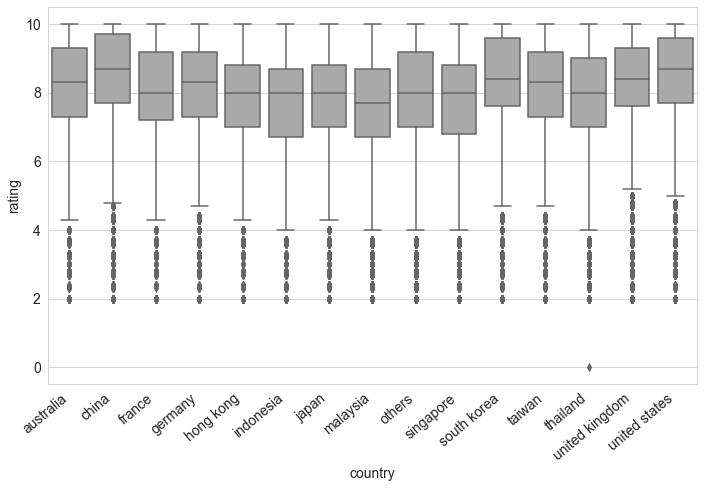

In [36]:
plt.figure(figsize=(10,7))
plt.rcParams.update({'font.size':14})
sns.set_style('whitegrid')
ax = sns.boxplot('country','rating',data = data_notnull,order = cnt_order,color='darkgray')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

In [37]:
cnt_gr_size = data_notnull.groupby(['country','group0']).size().reset_index(name='num')
lst = []
for i in cnt_order:
    a = cnt_gr_size[cnt_gr_size.country == i]
    a['cusum_each_cnt'] = 100*a.num.cumsum()/a.num.sum()
    lst.append(a)

C:\Users\Meeli\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [38]:
len(cnt_gr_size.country.unique())

15

In [39]:
# lets check out how lst work --> call by index btw 0- 13 will return a dataframe from each country
lst[1]

,country,group0,num,cusum_each_cnt
6,china,Business traveler,1345,7.827048
7,china,Couple,6499,45.647114
8,china,Family with teens,1815,56.209264
9,china,Family with young children,1573,65.363128
10,china,Group,1266,72.730447
11,china,Solo traveler,4686,100.000000


In [40]:
# this is used to create y-axis 
len([lst[i][lst[i].group0 == 'Business traveler'].iloc[0,-1] for i in range(15)])

15

In [41]:
cnt_order

array(['australia', 'china', 'france', 'germany', 'hong kong',
       'indonesia', 'japan', 'malaysia', 'others', 'singapore',
       'south korea', 'taiwan', 'thailand', 'united kingdom',
       'united states'], dtype=object)

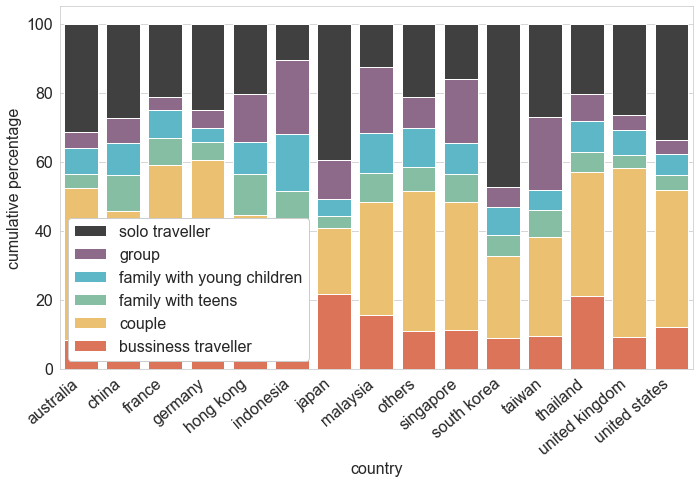

In [42]:

# use 100% stacked bar to visualize each group in each country
color = ['#F16745', '#FFC65D', '#7BC8A4', '#4CC3D9', '#93648D', '#404040']
plt.figure(figsize=(10,7))
sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 16})

ax = sns.barplot(cnt_order, [lst[i][lst[i].group0 == 'Solo traveler'].iloc[0,-1] for i in range(15)],color=color[5], label='solo traveller')
ax = sns.barplot(cnt_order, [lst[i][lst[i].group0 == 'Group'].iloc[0,-1] for i in range(15)],color=color[4],label='group')
ax = sns.barplot(cnt_order, [lst[i][lst[i].group0 == 'Family with young children'].iloc[0,-1] for i in range(15)],color=color[3], label='family with young children')
ax = sns.barplot(cnt_order, [lst[i][lst[i].group0 == 'Family with teens'].iloc[0,-1] for i in range(15)],color=color[2], label='family with teens')
ax = sns.barplot(cnt_order, [lst[i][lst[i].group0 == 'Couple'].iloc[0,-1] for i in range(15)] ,color=color[1],label='couple')
ax = sns.barplot(cnt_order, [lst[i][lst[i].group0 == 'Business traveler'].iloc[0,-1] for i in range(15)],color=color[0], label='bussiness traveller')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('country')
plt.ylabel('cumulative percentage')
plt.legend(facecolor='white',framealpha=1,loc='lower left')
plt.tight_layout()

(18.0, 0.0)

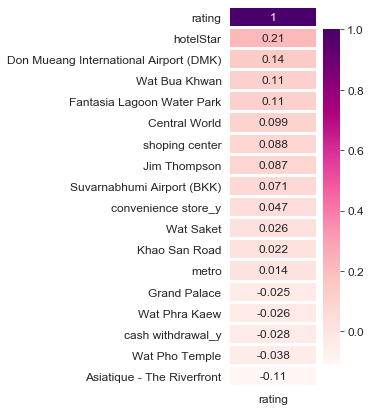

In [44]:
plt.figure(figsize=(2,7))
num_relation = pd.concat([y_numeric.reset_index(drop=True),data_notnull[numeric_variables].reset_index(drop=True)],axis=1)
plt.rcParams.update({'font.size':12})
ax = sns.heatmap(num_relation.corr(method='spearman')[['rating']].sort_values(by='rating',ascending=False),cmap='RdPu', annot=True, linewidth=2)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Text(0.5, 1, 'Spearman correlation')

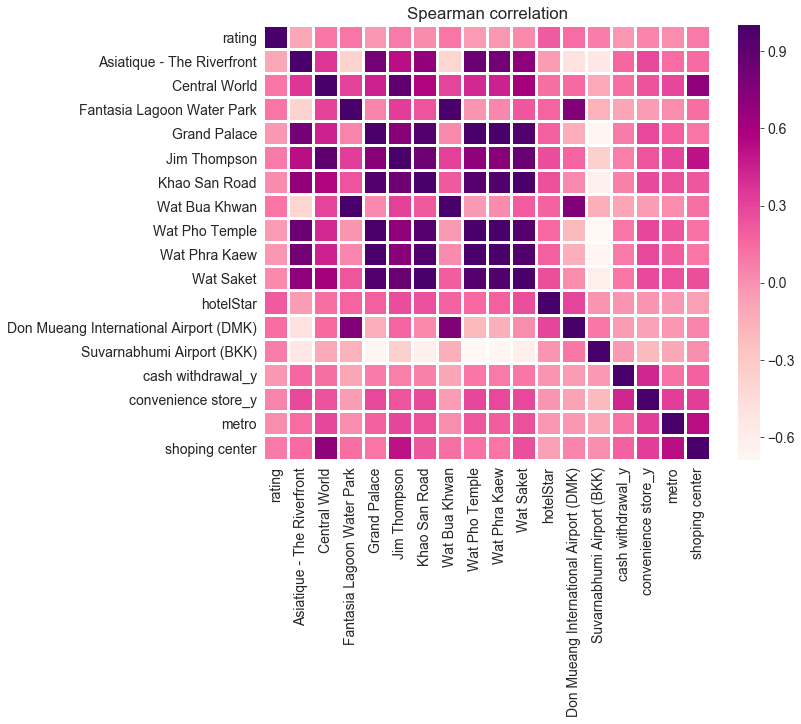

In [172]:
num_relation = pd.concat([y_numeric.reset_index(drop=True),data_notnull[numeric_variables].reset_index(drop=True)],axis=1)
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size':14})
ax = sns.heatmap(num_relation.corr(method='spearman'),cmap='RdPu', annot=False, linewidth=2, square=False)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Spearman correlation')

### - How about rating for each group in each country

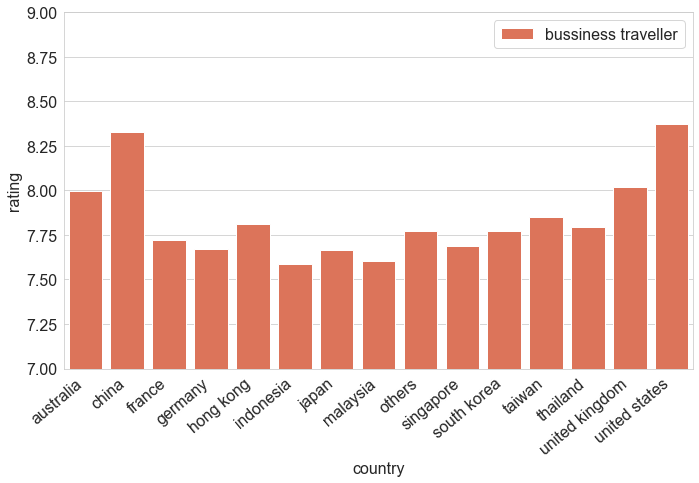

In [33]:
# create fake dataframes
size_gr = data_notnull.groupby(['country','group0'])['rating'].mean().reset_index(name='rating')

couple_r = size_gr[size_gr.group0 == 'Couple']
group_r = size_gr[size_gr.group0 == 'Group']
solo_r = size_gr[size_gr.group0 == 'Solo traveler']
famteen_r = size_gr[size_gr.group0 == 'Family with teens']
famyoung_r = size_gr[size_gr.group0 == 'Family with young children']
buss_r = size_gr[size_gr.group0 == 'Business traveler']

color = ['#F16745', '#FFC65D', '#7BC8A4', '#4CC3D9', '#93648D', '#404040']
# use box plot to see overall of the rating in each cnt
plt.figure(figsize=(10,7))
sns.set_style('whitegrid')
#ax = sns.barplot(solo_r.country,solo_r.rating,data = solo_r,order = cnt_order,color=color[5], label='solo traveller')
#ax = sns.barplot(group_r.country,group_r.rating,data = group_r,order = cnt_order,color=color[4],label='group')
#ax = sns.barplot(famyoung_r.country,famyoung_r.rating,data = famyoung_r,order = cnt_order,color=color[3], label='family with young children')
#ax = sns.barplot(famteen_r.country,famteen_r.rating,data = famteen_r,order = cnt_order,color=color[2], label='family with teens')
#ax = sns.barplot(couple_r.country,couple_r.rating,data = couple_r,order = cnt_order,color=color[1],label='couple')
ax = sns.barplot(buss_r.country,buss_r.rating,data = buss_r,order = cnt_order,color=color[0], label='bussiness traveller')

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.legend()
plt.ylim(7,9)
plt.tight_layout()
# but still not clearly visual

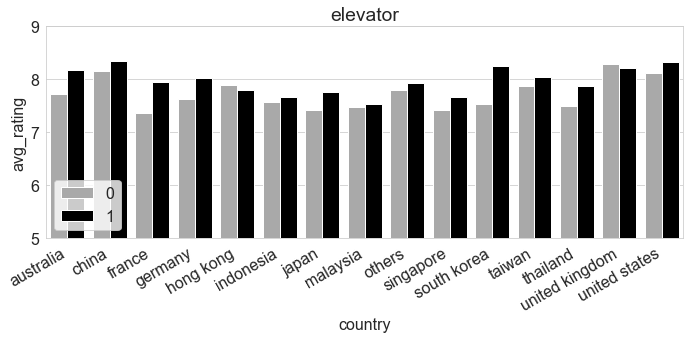

In [35]:
# country and each feature
f = 'elevator'
cond = data_notnull.groupby(['country',f])['rating'].mean().reset_index(name='avg_rating')

plt.figure(figsize = (10,5))
plt.title(f)
palette ={1:'black',0:'darkgray'}
ax = sns.barplot('country','avg_rating',hue =f, data=cond, palette=palette)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
#sns.barplot('avg_rating', 'country', data=df[df[f]==0])
plt.ylim(5,9)
plt.legend(loc='lower left',)
plt.tight_layout()

## 4.2 Try feature selection
### - Lasso: uses dummy_X and  y_numeric

In [45]:
dummy_X

,Asiatique - The Riverfront,Central World,Fantasia Lagoon Water Park,Grand Palace,Jim Thompson,Khao San Road,Wat Bua Khwan,Wat Pho Temple,Wat Phra Kaew,Wat Saket,...,air purifier_1,nightclub_1,additional toilet_1,in-room safe box_1,mosquito net_1,interconnecting room(s) available_1,kitchenette_1,lithuanian_1,breakfast [free]_1,access all room by interior corridor_1
0,13.89,9.07,15.61,14.22,10.25,13.58,16.37,14.09,14.18,12.60,...,0,0,0,0,0,0,0,0,0,0
1,13.89,9.07,15.61,14.22,10.25,13.58,16.37,14.09,14.18,12.60,...,0,0,0,0,0,0,0,0,0,0
2,13.89,9.07,15.61,14.22,10.25,13.58,16.37,14.09,14.18,12.60,...,0,0,0,0,0,0,0,0,0,0
3,13.89,9.07,15.61,14.22,10.25,13.58,16.37,14.09,14.18,12.60,...,0,0,0,0,0,0,0,0,0,0
4,13.89,9.07,15.61,14.22,10.25,13.58,16.37,14.09,14.18,12.60,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233537,11.14,5.42,7.40,7.87,5.43,6.79,8.55,8.06,7.88,6.39,...,0,0,0,0,0,0,0,0,0,0
233538,11.14,5.42,7.40,7.87,5.43,6.79,8.55,8.06,7.88,6.39,...,0,0,0,0,0,0,0,0,0,0
233539,11.14,5.42,7.40,7.87,5.43,6.79,8.55,8.06,7.88,6.39,...,0,0,0,0,0,0,0,0,0,0
233540,11.14,5.42,7.40,7.87,5.43,6.79,8.55,8.06,7.88,6.39,...,0,0,0,0,0,0,0,0,0,0


In [153]:
from sklearn.linear_model import LassoCV, RidgeCV

In [198]:
X_train, X_test, y_train, y_test = train_test_split(dummy_X, y_numeric, test_size=0.33, random_state=42)
lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005], normalize=True).fit(X_train,y_train)
lasso_coef = lasso.coef_

C:\Users\Meeli\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [185]:
coeff = pd.Series(lasso_coef, index = dummy_X.columns)

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

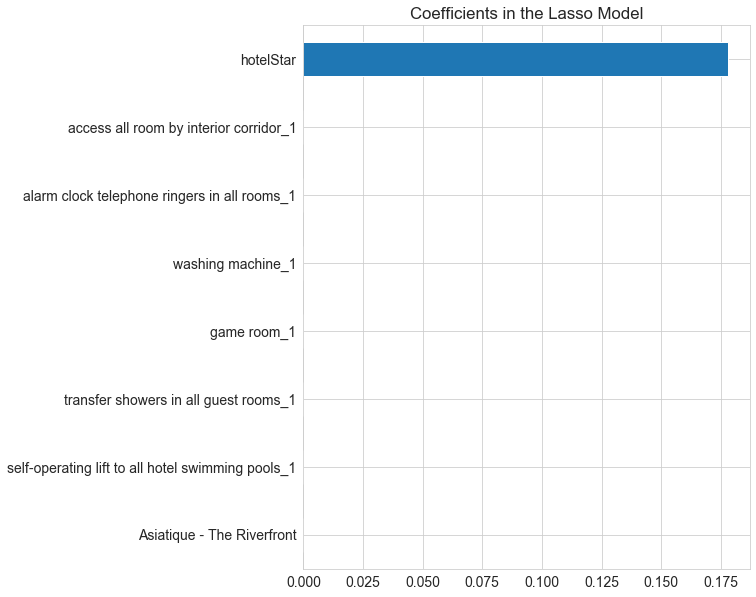

In [186]:
imp_coef = pd.concat([coeff.sort_values().head(4),
                     coeff.sort_values().tail(4)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [187]:
print(lasso.score(X_test, y_test))

0.022687017763568074


ValueError: x and y must have same first dimension, but have shapes (266,) and (283,)

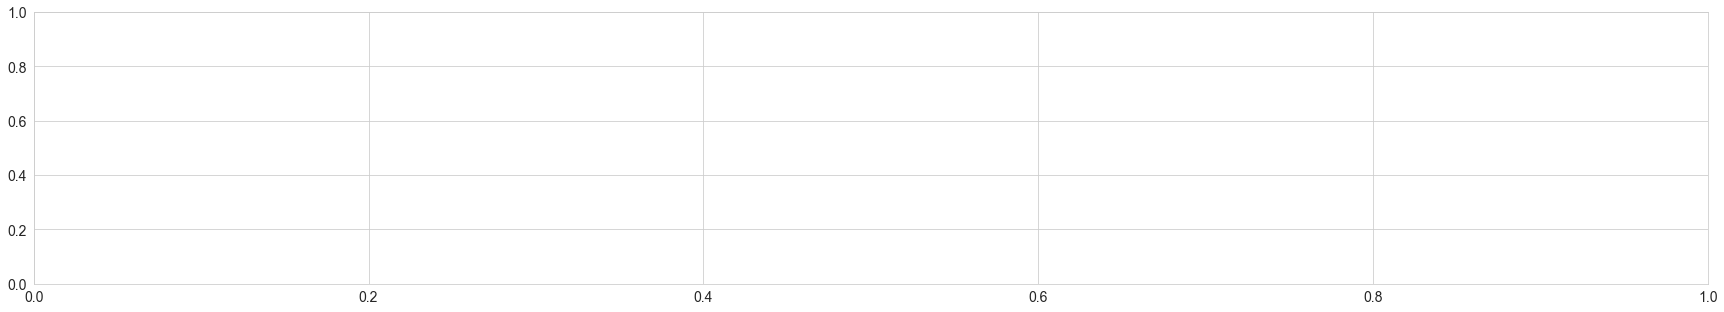

In [188]:
plt.figure(figsize=(30,5))
_ = plt.plot(range(len(dummy_X.columns)), lasso_coef)
_ = plt.xticks(range(len(dummy_X..columns)), dummy_X.columns, rotation = 60)
_ = plt.ylabel('Coeficients')

### - Ridge: uses dummy_X and  y_numeric

In [189]:
from sklearn.linear_model import Ridge, RidgeCV
ridge = RidgeCV(alphas = [1, 0.1, 0.001, 0.0005], normalize=True).fit(X_train,y_train)
ridge_coef = ridge.coef_

In [191]:
ridge_coef = pd.Series(ridge_coef, index = dummy_X.columns)

Text(0.5, 1.0, 'Coefficients in the Ridge Model')

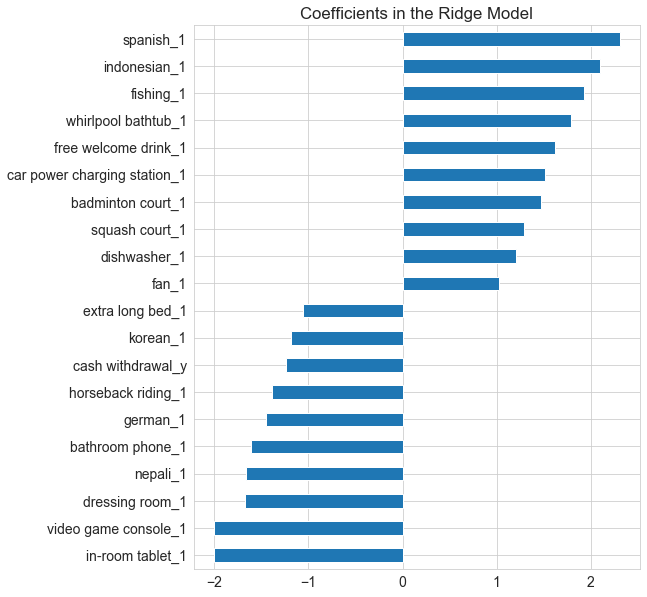

In [192]:
imp_coef = pd.concat([ridge_coef.sort_values().head(10),
                     ridge_coef.sort_values().tail(10)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")

In [ ]:
plt.figure(figsize=(30,5))
_ = plt.plot(range(len(names)), ridge_coef)
_ = plt.xticks(range(len(names)), names, rotation = 60)
_ = plt.ylabel('Coeficients')

### - Random Forest: uses encoded_X and  y_numeric

In [78]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [83]:
X_train, X_test, y_train, y_test = train_test_split(encoded_X, y_numeric, test_size=0.3, random_state=42)

# Create a random forest classifier
clf = RandomForestRegressor(n_estimators=100, max_depth = 3, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(X.columns.tolist(), clf.feature_importances_):
    print(feature)

('country', 0.0421466785439073)
('group0', 0.0)
('Asiatique - The Riverfront', 0.17366916602292717)
('Central World', 0.007380920201297033)
('Fantasia Lagoon Water Park', 0.0)
('Grand Palace', 0.0)
('Jim Thompson', 0.0)
('Khao San Road', 0.0)
('Wat Bua Khwan', 0.0)
('Wat Pho Temple', 0.0)
('Wat Phra Kaew', 0.0)
('Wat Saket', 0.0022273555564076447)
('hotelStar', 0.3980927473616936)
('room service', 0.0)
('estonian', 0.0)
('check-in/out [express]', 0.0)
('tennis court', 0.0)
('roll-in shower in some rooms', 0.0)
('currency exchange', 0.0006565517464822457)
('view ports in all guest room and suites doors', 0.0)
('facilities for disabled guests', 0.0)
('ukrainian', 0.0)
('non-smoking', 0.0)
('turkish', 0.0)
('free bottled water', 0.0)
('chinese [cantonese]', 0.0)
('desk', 0.0)
('locker', 0.0)
('babysitting service', 0.0)
('wi-fi [free]', 0.0)
('balcony/terrace', 0.0)
('microwave', 0.0)
('smoking allowed', 0.0)
('daily newspaper', 0.0)
('car power charging station', 0.0)
('car park [on-site

In [89]:
sorted_by_second = sorted(zip(X.columns.tolist(), clf.feature_importances_), key=lambda tup: tup[1])

In [90]:
sorted_by_second

[('group0', 0.0),
 ('Fantasia Lagoon Water Park', 0.0),
 ('Grand Palace', 0.0),
 ('Jim Thompson', 0.0),
 ('Khao San Road', 0.0),
 ('Wat Bua Khwan', 0.0),
 ('Wat Pho Temple', 0.0),
 ('Wat Phra Kaew', 0.0),
 ('room service', 0.0),
 ('estonian', 0.0),
 ('check-in/out [express]', 0.0),
 ('tennis court', 0.0),
 ('roll-in shower in some rooms', 0.0),
 ('view ports in all guest room and suites doors', 0.0),
 ('facilities for disabled guests', 0.0),
 ('ukrainian', 0.0),
 ('non-smoking', 0.0),
 ('turkish', 0.0),
 ('free bottled water', 0.0),
 ('chinese [cantonese]', 0.0),
 ('desk', 0.0),
 ('locker', 0.0),
 ('babysitting service', 0.0),
 ('wi-fi [free]', 0.0),
 ('balcony/terrace', 0.0),
 ('microwave', 0.0),
 ('smoking allowed', 0.0),
 ('daily newspaper', 0.0),
 ('car power charging station', 0.0),
 ('car park [on-site]', 0.0),
 ('fire extinguisher', 0.0),
 ('car park [charges apply]', 0.0),
 ('free welcome drink', 0.0),
 ('bathtub seat in some rooms', 0.0),
 ('lan internet in room [free]', 0.0),

In [96]:
sfm = SelectFromModel(clf, threshold=0.01)

# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                                max_depth=3,
                                                max_features='auto',
                                                max_leaf_nodes=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                n_estimators=100, n_jobs=-1,
                                                oob_score=False, random_state=0,
                                                verbose=0, warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=0.01)

In [216]:
# Print the names of the most important features
selected_cols = []
for feature_list_index in sfm.get_support(indices=True):
    selected_cols.append(X.columns.tolist()[feature_list_index])

In [116]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [118]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [121]:
# Apply The Full Featured Classifier To The Test Data
y_pred = clf.predict(X_test)

# View The Accuracy Of Our Full Feature (all Features) Model
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

2.2888531961256957
0.09686366666283452


In [122]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (selected Features) Model
print(mean_squared_error(y_test, y_important_pred))
print(r2_score(y_test, y_important_pred))

2.290822372279208
0.09608666858624837


In [133]:
a = pd.DataFrame({'true_y':y_test,
             'all_feat_y':y_pred,
             'selected_feat_y':y_important_pred}).apply(lambda x: round(x,ndigits=1))
a

,true_y,all_feat_y,selected_feat_y
176478,9.6,8.5,8.5
76259,8.0,8.5,8.5
140658,10.0,7.4,7.4
97075,8.7,8.1,8.1
89612,9.3,8.1,8.1
...,...,...,...
160242,9.0,8.1,8.1
203153,7.6,8.5,8.5
195870,6.4,8.1,8.1
50041,8.0,7.0,7.0


In [207]:
a['diff'] = abs(a.true_y-a.selected_feat_y)

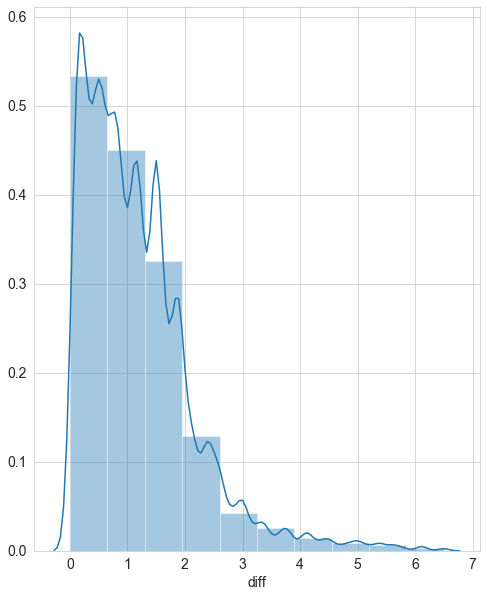

In [215]:
# See +/- differences from the real value distribution 
sns.distplot(a['diff'], bins=10)

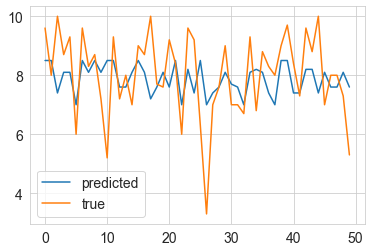

In [180]:
# See if this fit well ??
plt.plot(range(50),a.iloc[:50,2])
plt.plot(range(50),a.iloc[:50,0])
plt.legend(['predicted','true'])

# 4.2 Model selection
- XGB

In [72]:
import xgboost as xgb 

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [158]:
X_test[selected_cols]

,country,Asiatique - The Riverfront,hotelStar,fitness center,chinese [mandarin],Don Mueang International Airport (DMK),shoping center
176478,12,5.79,4.0,1,0,21.1,0.87
76259,10,6.83,4.5,1,0,21.2,2.40
140658,14,7.22,4.0,1,0,19.6,1.20
97075,13,7.65,4.0,1,0,20.5,2.80
89612,0,6.98,4.5,1,0,20.2,1.40
...,...,...,...,...,...,...,...
160242,13,7.71,4.0,1,0,21.1,3.40
203153,4,6.20,5.0,1,0,21.0,1.40
195870,10,9.02,4.0,1,1,21.1,4.90
50041,1,6.48,3.0,0,0,20.1,1.50


In [159]:
X_train, X_test, y_train, y_test = train_test_split(encoded_X, y_numeric, test_size=0.3, random_state=42)

xgb_default = xgb.XGBRegressor(learning_rate=0.1, max_deot=4)
xgb_default.fit(X_train[selected_cols].values, y_train.values)
#set eval_metrc ==> the model will try to minimize the rmse 
preds = xgb_default.predict(X_test[selected_cols].values)
r2 = r2_score(y_test.values, preds)
rmse = np.sqrt(mean_squared_error(y_test.values,preds))
print(f'R2 = {r2}')
print(f'RMSE : {rmse}')

[20:30:00] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 = 0.13999825357819018
RMSE : 1.4763250153912142


In [160]:
print('mse :',mean_squared_error(y_test.values,preds))

mse : 2.179535551069869


In [76]:
y_test.values

array([ 9.6,  8. , 10. , ...,  6.4,  8. ,  6.7])

---------------------------------------
## 5.1 Categorical visualization
#

In [61]:
data_notnull_cat = data_notnull[['rating_cat']+numeric_variables+categorical_variables]

In [68]:
data_notnull_cat['rating_cat']

0         7-8
1         7-8
2         7-8
3         5-6
4         5-6
         ... 
233537    8-9
233538    8-9
233539    8-9
233540    7-8
233541    6-7
Name: rating_cat, Length: 233542, dtype: category
Categories (10, object): [0-1 < 1-2 < 2-3 < 3-4 ... 6-7 < 7-8 < 8-9 < 9-10]

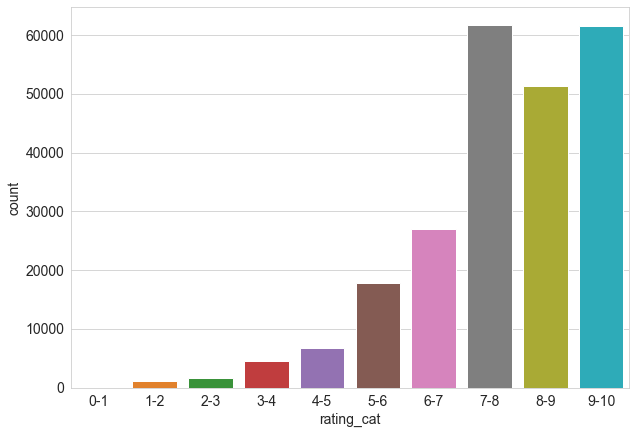

In [69]:
plt.figure(figsize=(10,7))
plt.rcParams.update({'font.size':14})
sns.countplot( data_notnull_cat['rating_cat'])

In [144]:
plt.plot(a.true_y[50])

,true_y,all_feat_y,selected_feat_y,diff
176478,9.6,8.5,8.5,1.1
76259,8.0,8.5,8.5,-0.5
140658,10.0,7.4,7.4,2.6
97075,8.7,8.1,8.1,0.6
89612,9.3,8.1,8.1,1.2
...,...,...,...,...
160242,9.0,8.1,8.1,0.9
203153,7.6,8.5,8.5,-0.9
195870,6.4,8.1,8.1,-1.7
50041,8.0,7.0,7.0,1.0


In [116]:
lasso = LassoCV(alphas = [10,1, 0.1, 0.001, 0.0005], normalize=True).fit(X_train.values,y_train.values)
preds = lasso.predict(X_test.values)
r2 = r2_score(y_test.values, preds)
rmse = np.sqrt(mean_squared_error(y_test.values,preds))
print(f'R2 = {r2}')
print(f'RMSE : {rmse}')

C:\Users\Meeli\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


R2 = 0.02323637046082494
RMSE : 1.573356186255824
